# Deep Q-Network (DQN)
---
In this notebook, you will implement a DQN agent with OpenAI Gym's LunarLander-v2 environment.

### 1. Import the Necessary Packages

In [8]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import environmentv1 as e
import seaborn as sns
%matplotlib inline

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

1/3 -- 0.33475494384765625
0.35 -- 0.36702728271484375
0.4 -- 0.47370147705078125
0.45 -- 0.6032638549804688

In [9]:
env = e.Environment(0.35, 9)
from dqn_agent import Agent
agent = Agent(state_size=2, action_size=3, seed=0)

In [10]:
rho = 0.36702728271484375
def evalReward(reward):
    reward = (1 - rho) * reward[0] - rho * reward[1]
    return reward

### 3. Train the Agent with DQN

Run the code cell below to train the agent from scratch.  You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance!

Alternatively, you can skip to the next step below (**4. Watch a Smart Agent!**), to load the saved model weights from a pre-trained agent.

Episode 1	  Score: -1078.67
0.995


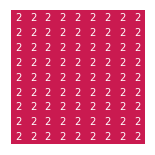

Episode 2	  Score: -1079.62
0.990025


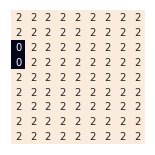

Episode 3	  Score: -1175.88
0.985074875


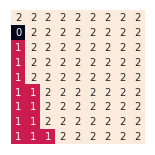

Episode 4	  Score: -1161.14
0.9801495006250001


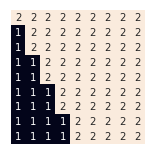

Episode 5	  Score: -1111.13
0.9752487531218751


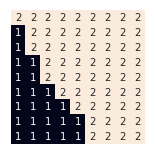

Episode 6	  Score: -1110.16
0.9703725093562657


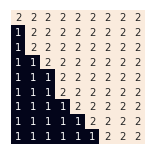

Episode 7	  Score: -1016.68
0.9655206468094844


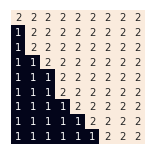

Episode 8	  Score: -1105.72
0.960693043575437


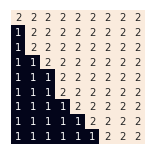

Episode 9	  Score: -1059.11
0.9558895783575597


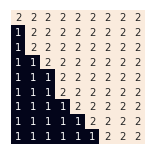

Episode 10	  Score: -1098.84
0.9511101304657719


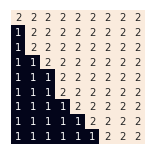

Episode 11	  Score: -998.55
0.946354579813443


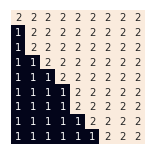

Episode 12	  Score: -1111.88
0.9416228069143757


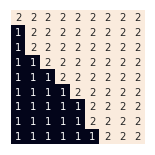

Episode 13	  Score: -969.80
0.9369146928798039


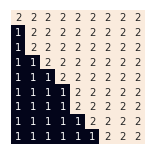

Episode 14	  Score: -1100.74
0.9322301194154049


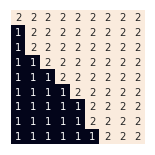

Episode 15	  Score: -980.07
0.9275689688183278


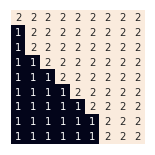

Episode 16	  Score: -1054.67
0.9229311239742362


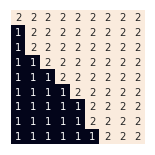

Episode 17	  Score: -1086.29
0.918316468354365


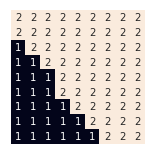

Episode 18	  Score: -1037.04
0.9137248860125932


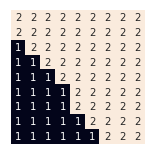

Episode 19	  Score: -1021.60
0.9091562615825302


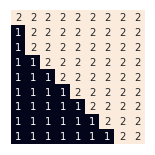

Episode 20	  Score: -1034.65
0.9046104802746175


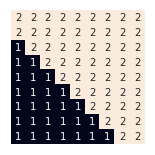

Episode 21	  Score: -957.09
0.9000874278732445


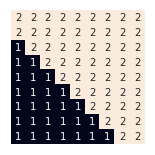

Episode 22	  Score: -928.53
0.8955869907338783


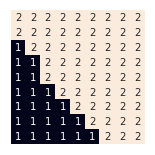

Episode 23	  Score: -1036.61
0.8911090557802088


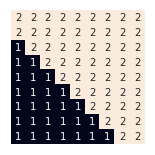

Episode 24	  Score: -1010.08
0.8866535105013078


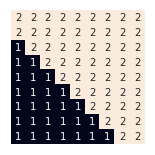

Episode 25	  Score: -884.44
0.8822202429488013


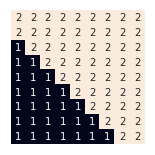

Episode 26	  Score: -1028.27
0.8778091417340573


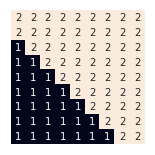

Episode 27	  Score: -977.19
0.8734200960253871


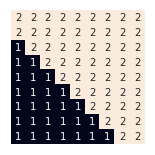

Episode 28	  Score: -970.81
0.8690529955452602


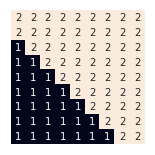

Episode 29	  Score: -927.01
0.8647077305675338


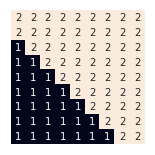

Episode 30	  Score: -965.14
0.8603841919146962


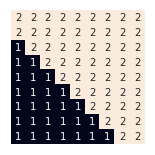

Episode 31	  Score: -952.80
0.8560822709551227


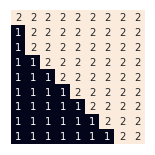

Episode 32	  Score: -946.89
0.851801859600347


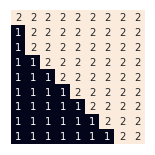

Episode 33	  Score: -874.30
0.8475428503023453


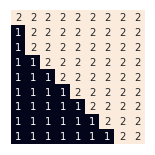

Episode 34	  Score: -986.14
0.8433051360508336


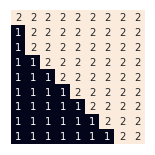

Episode 35	  Score: -866.77
0.8390886103705794


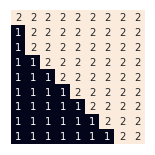

Episode 36	  Score: -943.13
0.8348931673187264


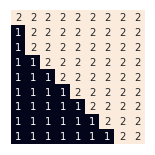

Episode 37	  Score: -924.42
0.8307187014821328


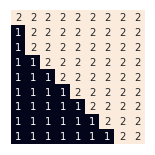

Episode 38	  Score: -962.86
0.8265651079747222


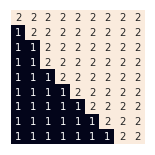

Episode 39	  Score: -990.27
0.8224322824348486


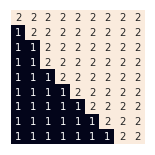

Episode 40	  Score: -877.38
0.8183201210226743


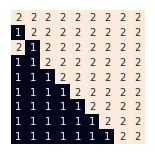

Episode 41	  Score: -853.73
0.8142285204175609


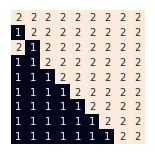

Episode 42	  Score: -948.49
0.810157377815473


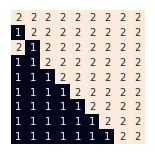

Episode 43	  Score: -974.61
0.8061065909263957


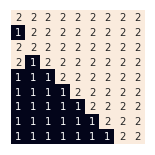

Episode 44	  Score: -982.43
0.8020760579717637


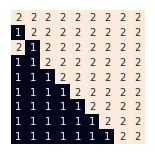

Episode 45	  Score: -885.44
0.798065677681905


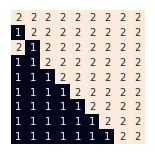

Episode 46	  Score: -926.16
0.7940753492934954


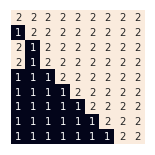

Episode 47	  Score: -865.83
0.7901049725470279


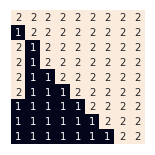

Episode 48	  Score: -916.49
0.7861544476842928


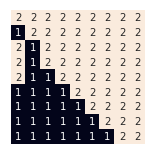

Episode 49	  Score: -983.34
0.7822236754458713


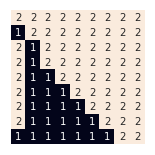

Episode 50	  Score: -760.29
0.778312557068642


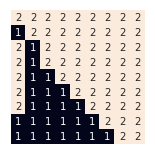

Episode 51	  Score: -803.98
0.7744209942832988


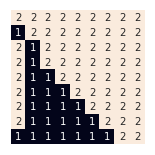

Episode 52	  Score: -814.62
0.7705488893118823


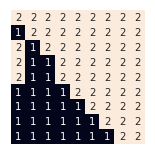

Episode 53	  Score: -793.84
0.7666961448653229


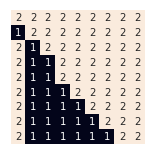

Episode 54	  Score: -835.04
0.7628626641409962


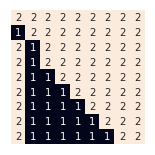

Episode 55	  Score: -854.07
0.7590483508202912


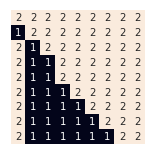

Episode 56	  Score: -728.07
0.7552531090661897


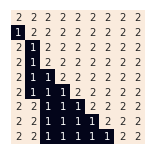

Episode 57	  Score: -872.90
0.7514768435208588


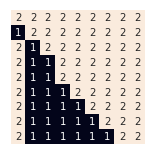

Episode 58	  Score: -770.22
0.7477194593032545


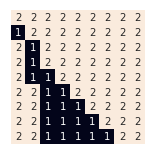

Episode 59	  Score: -803.33
0.7439808620067382


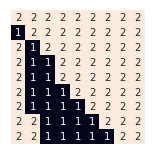

Episode 60	  Score: -903.63
0.7402609576967045


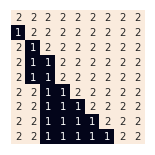

Episode 61	  Score: -779.07
0.736559652908221


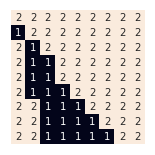

Episode 62	  Score: -861.39
0.7328768546436799


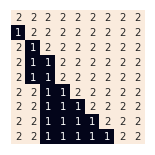

Episode 63	  Score: -780.75
0.7292124703704616


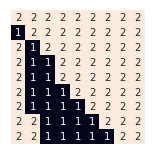

Episode 64	  Score: -792.81
0.7255664080186093


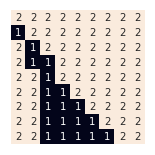

Episode 65	  Score: -793.85
0.7219385759785162


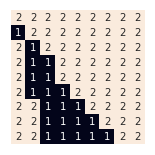

Episode 66	  Score: -831.31
0.7183288830986236


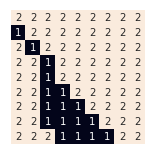

Episode 67	  Score: -728.88
0.7147372386831305


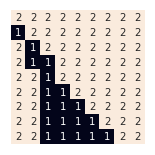

Episode 68	  Score: -823.22
0.7111635524897149


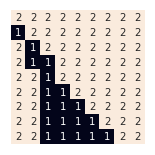

Episode 69	  Score: -829.20
0.7076077347272662


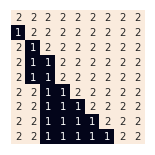

Episode 70	  Score: -880.17
0.7040696960536299


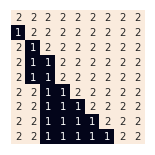

Episode 71	  Score: -844.48
0.7005493475733617


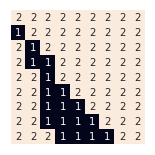

Episode 72	  Score: -864.24
0.697046600835495


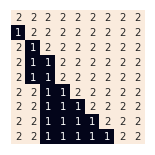

Episode 73	  Score: -824.95
0.6935613678313175


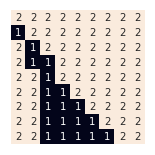

Episode 74	  Score: -795.54
0.6900935609921609


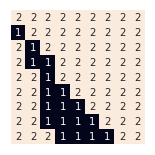

Episode 75	  Score: -821.68
0.6866430931872001


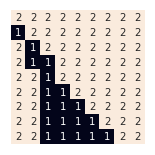

Episode 76	  Score: -754.49
0.6832098777212641


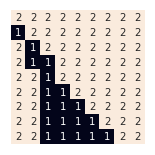

Episode 77	  Score: -793.70
0.6797938283326578


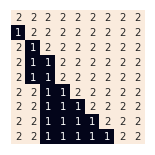

Episode 78	  Score: -754.01
0.6763948591909945


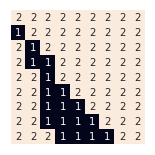

Episode 79	  Score: -812.29
0.6730128848950395


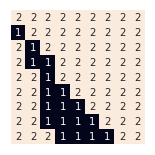

Episode 80	  Score: -792.41
0.6696478204705644


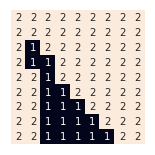

Episode 81	  Score: -738.31
0.6662995813682115


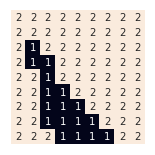

Episode 82	  Score: -756.13
0.6629680834613705


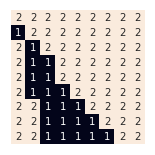

Episode 83	  Score: -757.91
0.6596532430440636


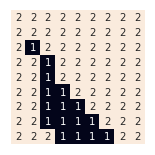

Episode 84	  Score: -764.47
0.6563549768288433


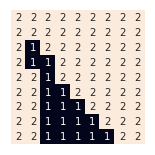

Episode 85	  Score: -705.59
0.653073201944699


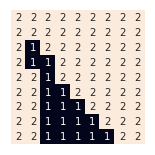

Episode 86	  Score: -773.84
0.6498078359349755


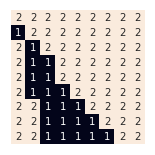

Episode 87	  Score: -720.18
0.6465587967553006


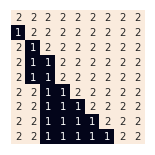

Episode 88	  Score: -679.68
0.6433260027715241


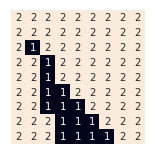

Episode 89	  Score: -732.81
0.6401093727576664


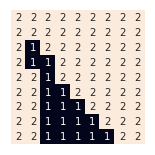

Episode 90	  Score: -671.17
0.6369088258938781


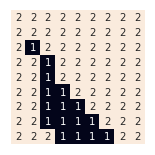

Episode 91	  Score: -677.81
0.6337242817644086


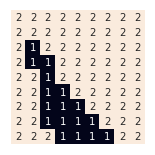

Episode 92	  Score: -732.69
0.6305556603555866


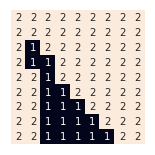

Episode 93	  Score: -752.32
0.6274028820538087


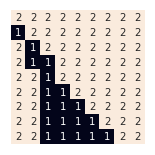

Episode 94	  Score: -658.33
0.6242658676435396


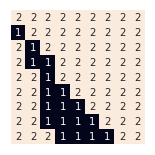

Episode 95	  Score: -782.04
0.6211445383053219


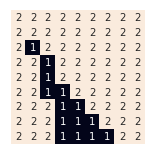

Episode 96	  Score: -735.18
0.6180388156137953


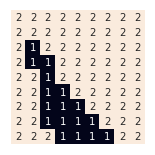

Episode 97	  Score: -688.78
0.6149486215357263


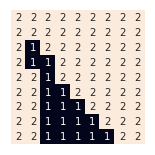

Episode 98	  Score: -701.87
0.6118738784280476


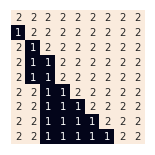

Episode 99	  Score: -727.79
0.6088145090359074


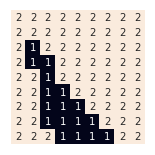

Episode 100	  Score: -661.56
0.6057704364907278


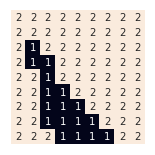

Episode 101	  Score: -708.30
0.6027415843082742


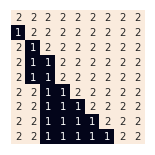

Episode 102	  Score: -648.80
0.5997278763867329


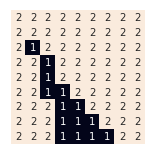

Episode 103	  Score: -613.89
0.5967292370047992


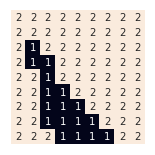

Episode 104	  Score: -702.46
0.5937455908197752


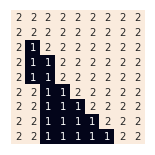

Episode 105	  Score: -710.95
0.5907768628656763


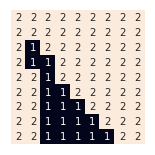

Episode 106	  Score: -636.53
0.5878229785513479


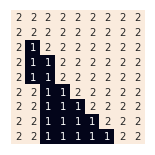

Episode 107	  Score: -698.73
0.5848838636585911


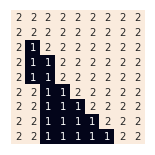

Episode 108	  Score: -702.51
0.5819594443402982


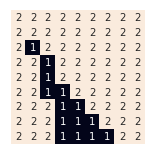

Episode 109	  Score: -656.63
0.5790496471185967


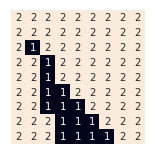

Episode 110	  Score: -734.69
0.5761543988830038


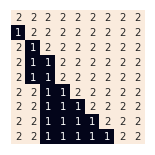

Episode 111	  Score: -627.83
0.5732736268885887


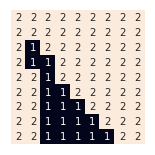

Episode 112	  Score: -731.74
0.5704072587541458


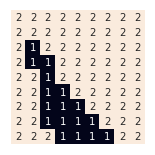

Episode 113	  Score: -632.64
0.567555222460375


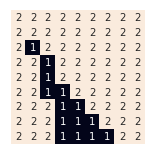

Episode 114	  Score: -584.62
0.5647174463480732


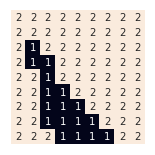

Episode 115	  Score: -670.41
0.5618938591163328


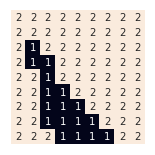

Episode 116	  Score: -771.32
0.5590843898207511


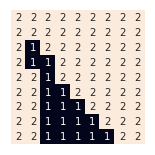

Episode 117	  Score: -645.75
0.5562889678716474


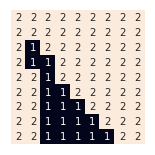

Episode 118	  Score: -678.89
0.5535075230322891


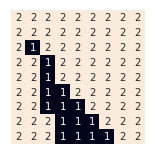

Episode 119	  Score: -695.00
0.5507399854171277


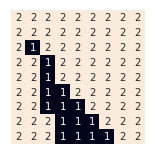

Episode 120	  Score: -670.44
0.547986285490042


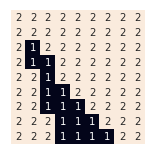

Episode 121	  Score: -689.91
0.5452463540625918


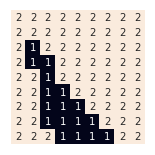

Episode 122	  Score: -619.00
0.5425201222922789


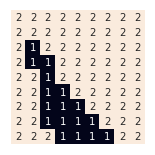

Episode 123	  Score: -688.48
0.5398075216808175


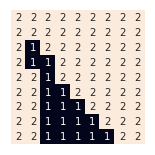

Episode 124	  Score: -642.46
0.5371084840724134


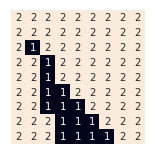

Episode 125	  Score: -615.49
0.5344229416520513


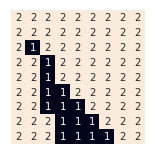

Episode 126	  Score: -689.28
0.531750826943791


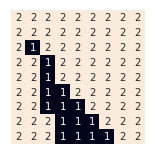

Episode 127	  Score: -653.72
0.5290920728090721


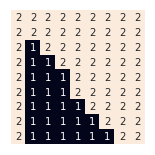

Episode 128	  Score: -680.88
0.5264466124450268


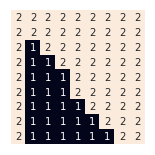

Episode 129	  Score: -617.06
0.5238143793828016


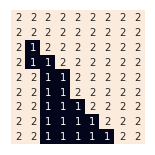

Episode 130	  Score: -641.94
0.5211953074858876


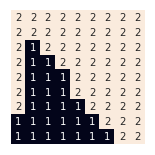

Episode 131	  Score: -650.00
0.5185893309484582


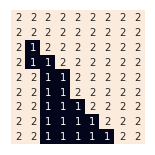

Episode 132	  Score: -680.00
0.5159963842937159


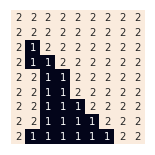

Episode 133	  Score: -626.60
0.5134164023722473


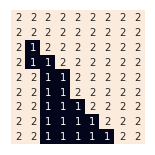

Episode 134	  Score: -654.35
0.510849320360386


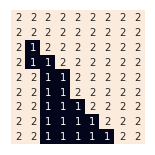

Episode 135	  Score: -650.82
0.5082950737585841


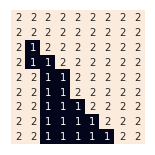

Episode 136	  Score: -588.57
0.5057535983897912


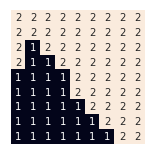

Episode 137	  Score: -655.20
0.5032248303978422


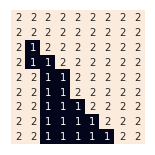

Episode 138	  Score: -542.69
0.500708706245853


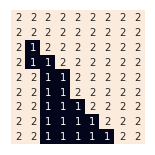

Episode 139	  Score: -615.22
0.4982051627146237


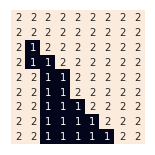

Episode 140	  Score: -611.02
0.49571413690105054


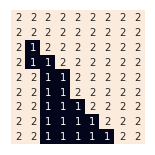

Episode 141	  Score: -599.40
0.4932355662165453


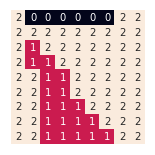

Episode 142	  Score: -558.56
0.4907693883854626


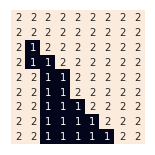

Episode 143	  Score: -618.49
0.4883155414435353


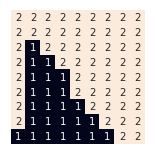

Episode 144	  Score: -475.91
0.4858739637363176


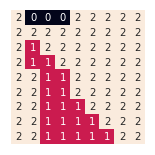

Episode 145	  Score: -538.13
0.483444593917636


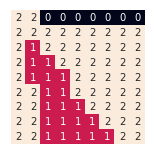

Episode 146	  Score: -600.14
0.4810273709480478


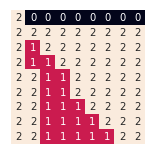

Episode 147	  Score: -501.99
0.47862223409330756


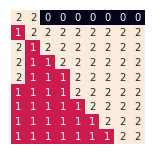

Episode 148	  Score: -543.41
0.47622912292284103


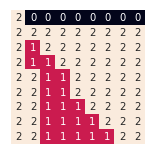

Episode 149	  Score: -565.77
0.4738479773082268


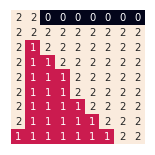

Episode 150	  Score: -501.03
0.47147873742168567


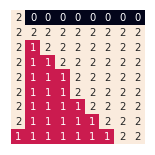

Episode 151	  Score: -567.39
0.46912134373457726


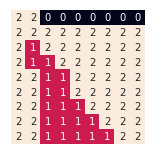

Episode 152	  Score: -503.54
0.46677573701590436


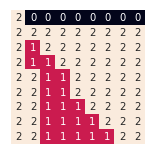

Episode 153	  Score: -492.41
0.46444185833082485


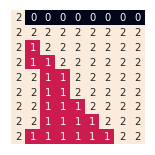

Episode 154	  Score: -468.47
0.46211964903917074


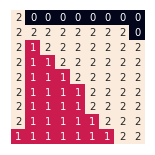

Episode 155	  Score: -435.31
0.4598090507939749


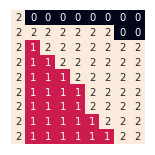

Episode 156	  Score: -530.53
0.457510005540005


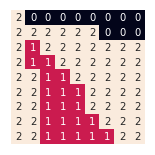

Episode 157	  Score: -516.21
0.45522245551230495


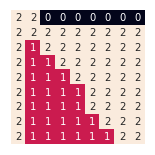

Episode 158	  Score: -501.92
0.4529463432347434


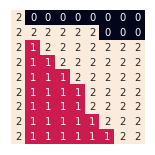

Episode 159	  Score: -594.43
0.4506816115185697


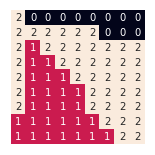

Episode 160	  Score: -517.38
0.4484282034609769


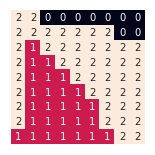

Episode 161	  Score: -525.87
0.446186062443672


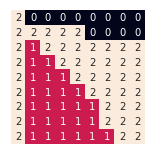

Episode 162	  Score: -488.30
0.4439551321314536


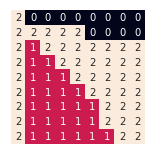

Episode 163	  Score: -559.09
0.4417353564707963


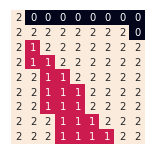

Episode 164	  Score: -472.67
0.43952667968844233


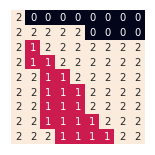

Episode 165	  Score: -388.48
0.43732904629000013


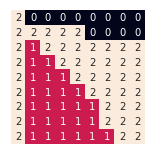

Episode 166	  Score: -555.42
0.4351424010585501


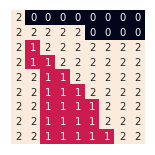

Episode 167	  Score: -376.25
0.43296668905325736


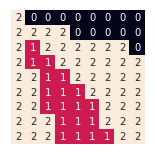

Episode 168	  Score: -422.18
0.43080185560799106


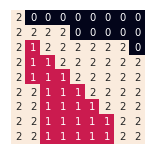

Episode 169	  Score: -420.30
0.4286478463299511


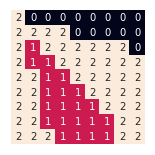

Episode 170	  Score: -489.31
0.42650460709830135


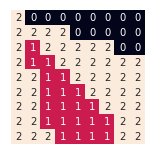

Episode 171	  Score: -398.09
0.42437208406280985


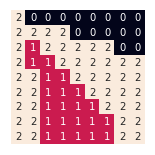

Episode 172	  Score: -481.25
0.4222502236424958


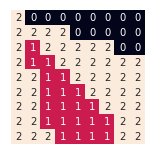

Episode 173	  Score: -456.38
0.42013897252428334


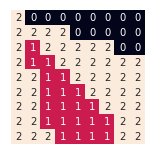

Episode 174	  Score: -421.08
0.4180382776616619


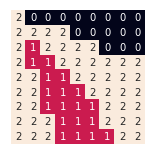

Episode 175	  Score: -409.12
0.4159480862733536


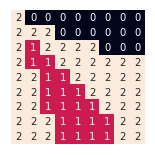

Episode 176	  Score: -455.60
0.41386834584198684


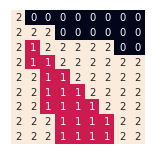

Episode 177	  Score: -440.32
0.4117990041127769


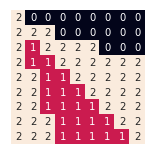

Episode 178	  Score: -428.29
0.40974000909221303


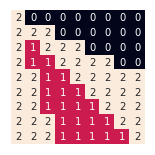

Episode 179	  Score: -407.63
0.40769130904675194


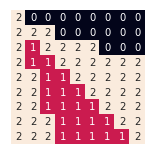

Episode 180	  Score: -406.29
0.40565285250151817


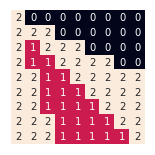

Episode 181	  Score: -384.66
0.4036245882390106


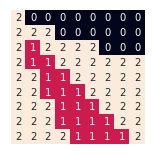

Episode 182	  Score: -446.28
0.4016064652978155


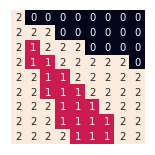

Episode 183	  Score: -495.52
0.3995984329713264


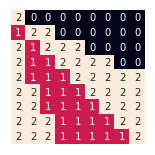

Episode 184	  Score: -458.34
0.3976004408064698


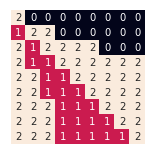

Episode 185	  Score: -382.27
0.39561243860243744


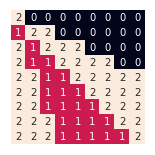

Episode 186	  Score: -391.23
0.3936343764094253


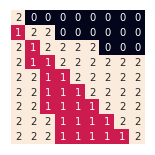

Episode 187	  Score: -389.60
0.39166620452737816


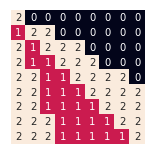

Episode 188	  Score: -404.85
0.3897078735047413


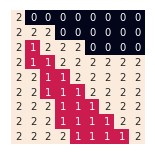

Episode 189	  Score: -434.86
0.3877593341372176


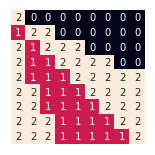

Episode 190	  Score: -382.46
0.3858205374665315


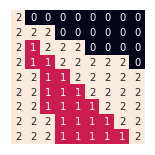

Episode 191	  Score: -369.55
0.38389143477919885


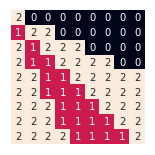

Episode 192	  Score: -389.92
0.3819719776053028


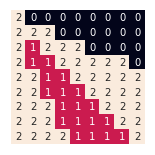

Episode 193	  Score: -412.93
0.3800621177172763


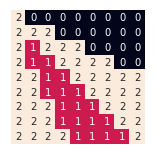

Episode 194	  Score: -381.57
0.37816180712868996


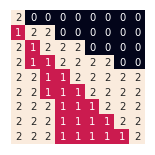

Episode 195	  Score: -394.05
0.37627099809304654


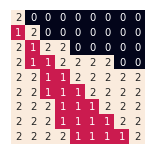

Episode 196	  Score: -380.57
0.3743896431025813


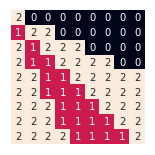

Episode 197	  Score: -432.10
0.37251769488706843


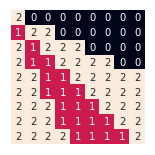

Episode 198	  Score: -403.45
0.3706551064126331


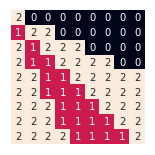

Episode 199	  Score: -362.27
0.36880183088056995


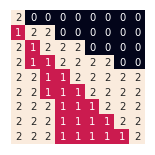

Episode 200	  Score: -323.23
0.3669578217261671


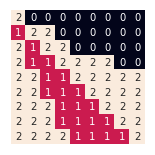

Episode 201	  Score: -441.36
0.36512303261753626


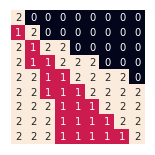

Episode 202	  Score: -359.98
0.3632974174544486


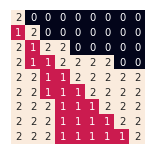

Episode 203	  Score: -416.30
0.3614809303671764


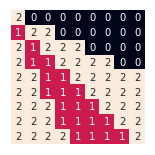

Episode 204	  Score: -425.20
0.3596735257153405


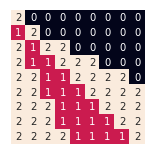

Episode 205	  Score: -359.66
0.3578751580867638


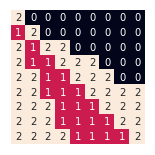

Episode 206	  Score: -350.20
0.35608578229633


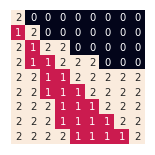

Episode 207	  Score: -386.99
0.3543053533848483


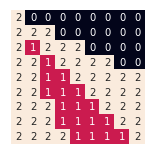

Episode 208	  Score: -363.41
0.35253382661792404


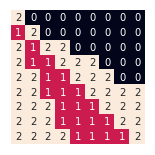

Episode 209	  Score: -334.30
0.3507711574848344


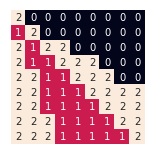

Episode 210	  Score: -387.22
0.34901730169741024


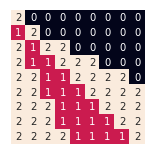

Episode 211	  Score: -377.21
0.3472722151889232


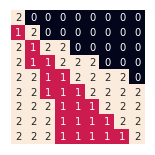

Episode 212	  Score: -345.89
0.3455358541129786


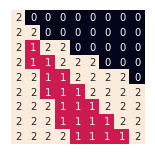

Episode 213	  Score: -271.21
0.3438081748424137


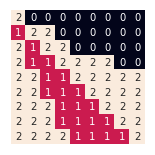

Episode 214	  Score: -292.30
0.3420891339682016


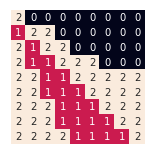

Episode 215	  Score: -311.71
0.3403786882983606


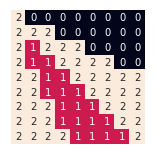

Episode 216	  Score: -307.62
0.3386767948568688


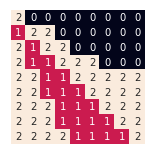

Episode 217	  Score: -341.11
0.33698341088258443


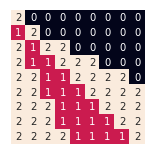

Episode 218	  Score: -346.66
0.3352984938281715


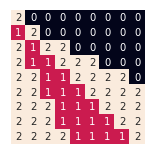

Episode 219	  Score: -312.28
0.33362200135903064


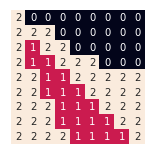

Episode 220	  Score: -314.14
0.33195389135223546


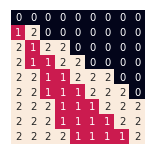

Episode 221	  Score: -378.77
0.3302941218954743


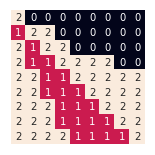

Episode 222	  Score: -392.56
0.32864265128599696


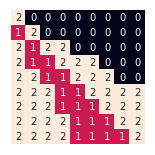

Episode 223	  Score: -333.22
0.326999438029567


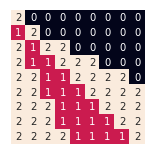

Episode 224	  Score: -335.94
0.3253644408394192


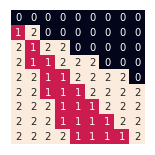

Episode 225	  Score: -339.60
0.3237376186352221


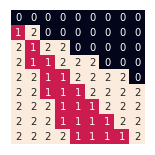

Episode 226	  Score: -325.57
0.322118930542046


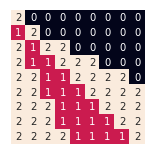

Episode 227	  Score: -389.53
0.32050833588933575


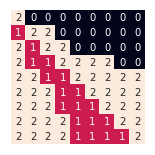

Episode 228	  Score: -300.36
0.31890579420988907


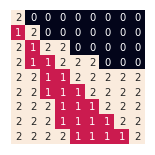

Episode 229	  Score: -361.81
0.3173112652388396


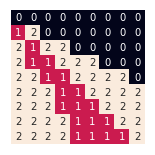

Episode 230	  Score: -314.12
0.3157247089126454


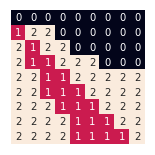

Episode 231	  Score: -324.70
0.3141460853680822


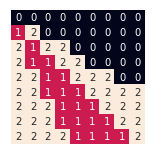

Episode 232	  Score: -359.34
0.3125753549412418


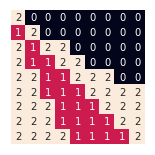

Episode 233	  Score: -364.82
0.31101247816653554


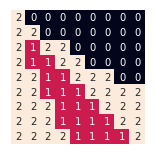

Episode 234	  Score: -325.37
0.30945741577570285


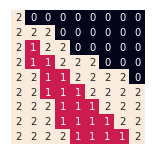

Episode 235	  Score: -321.19
0.3079101286968243


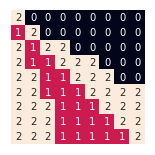

Episode 236	  Score: -327.03
0.3063705780533402


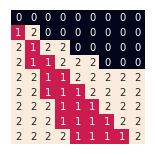

Episode 237	  Score: -336.72
0.30483872516307353


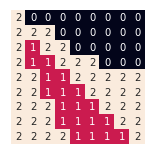

Episode 238	  Score: -343.30
0.3033145315372582


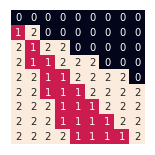

Episode 239	  Score: -287.33
0.3017979588795719


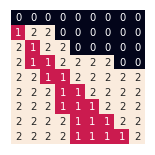

Episode 240	  Score: -291.35
0.30028896908517405


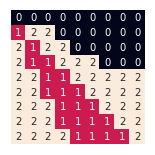

Episode 241	  Score: -290.09
0.2987875242397482


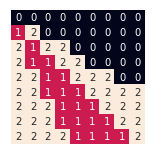

Episode 242	  Score: -324.08
0.29729358661854943


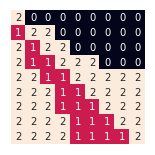

Episode 243	  Score: -281.09
0.29580711868545667


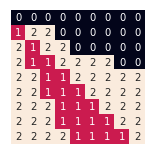

Episode 244	  Score: -256.91
0.2943280830920294


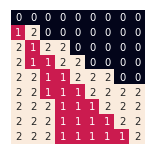

Episode 245	  Score: -290.84
0.29285644267656924


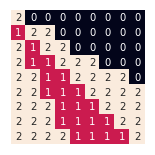

Episode 246	  Score: -308.97
0.2913921604631864


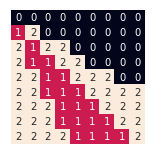

Episode 247	  Score: -324.21
0.28993519966087045


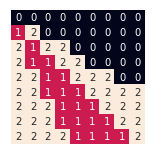

Episode 248	  Score: -266.94
0.2884855236625661


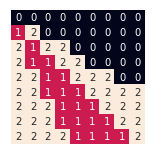

Episode 249	  Score: -255.98
0.28704309604425327


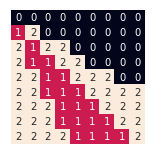

Episode 250	  Score: -252.43
0.285607880564032


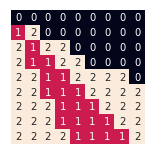

Episode 251	  Score: -358.00
0.28417984116121187


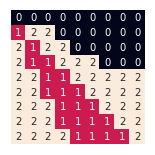

Episode 252	  Score: -267.39
0.2827589419554058


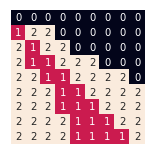

Episode 253	  Score: -270.39
0.28134514724562876


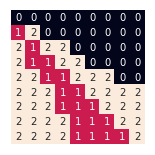

Episode 254	  Score: -280.63
0.2799384215094006


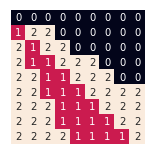

Episode 255	  Score: -270.22
0.27853872940185365


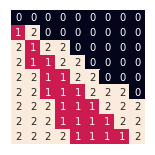

Episode 256	  Score: -238.63
0.27714603575484437


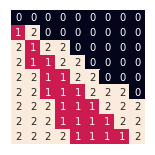

Episode 257	  Score: -321.69
0.2757603055760701


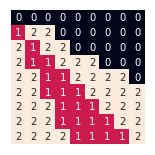

Episode 258	  Score: -258.66
0.2743815040481898


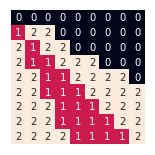

Episode 259	  Score: -273.66
0.2730095965279488


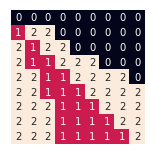

Episode 260	  Score: -213.84
0.27164454854530906


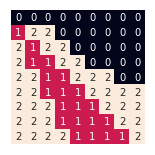

Episode 261	  Score: -281.64
0.2702863258025825


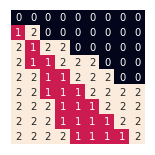

Episode 262	  Score: -277.37
0.2689348941735696


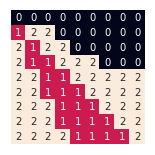

Episode 263	  Score: -299.32
0.26759021970270175


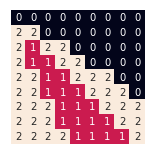

Episode 264	  Score: -223.84
0.2662522686041882


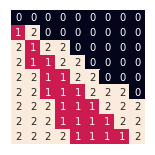

Episode 265	  Score: -242.10
0.2649210072611673


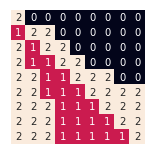

Episode 266	  Score: -313.17
0.26359640222486147


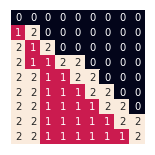

Episode 267	  Score: -225.80
0.26227842021373715


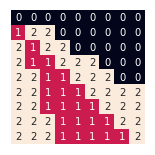

Episode 268	  Score: -241.37
0.2609670281126685


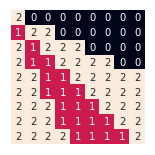

Episode 269	  Score: -286.16
0.25966219297210513


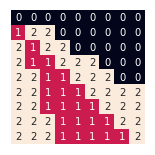

Episode 270	  Score: -265.85
0.2583638820072446


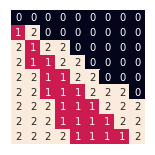

Episode 271	  Score: -217.12
0.2570720625972084


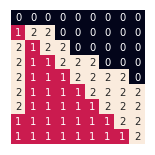

Episode 272	  Score: -228.40
0.25578670228422234


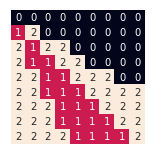

Episode 273	  Score: -266.22
0.25450776877280124


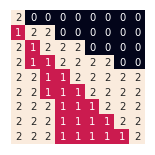

Episode 274	  Score: -270.20
0.2532352299289372


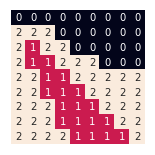

Episode 275	  Score: -277.08
0.2519690537792925


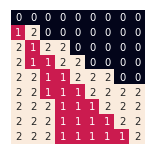

Episode 276	  Score: -308.38
0.2507092085103961


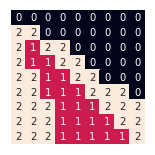

Episode 277	  Score: -263.11
0.2494556624678441


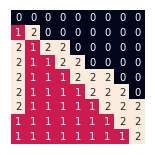

Episode 278	  Score: -252.42
0.24820838415550486


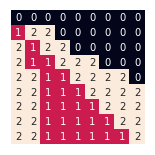

Episode 279	  Score: -246.42
0.24696734223472733


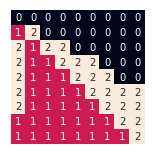

Episode 280	  Score: -267.00
0.2457325055235537


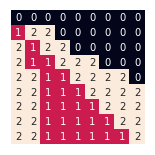

Episode 281	  Score: -251.02
0.24450384299593592


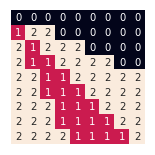

Episode 282	  Score: -233.01
0.24328132378095624


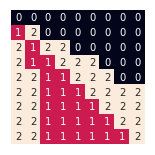

Episode 283	  Score: -248.99
0.24206491716205145


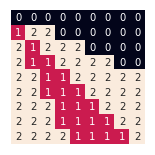

Episode 284	  Score: -253.47
0.2408545925762412


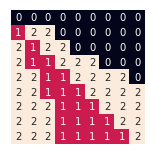

Episode 285	  Score: -250.84
0.23965031961336


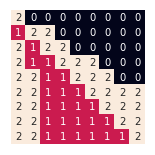

Episode 286	  Score: -257.49
0.2384520680152932


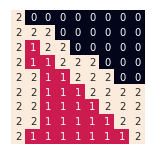

Episode 287	  Score: -306.88
0.23725980767521673


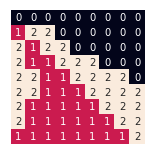

Episode 288	  Score: -250.69
0.23607350863684065


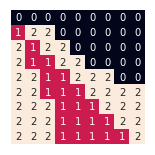

Episode 289	  Score: -179.16
0.23489314109365644


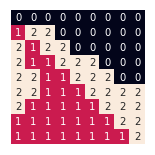

Episode 290	  Score: -246.68
0.23371867538818816


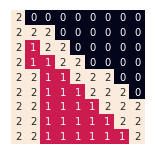

Episode 291	  Score: -245.39
0.23255008201124722


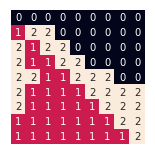

Episode 292	  Score: -252.26
0.231387331601191


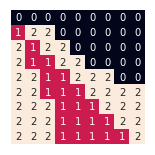

Episode 293	  Score: -168.67
0.23023039494318503


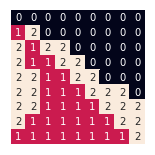

Episode 294	  Score: -207.06
0.2290792429684691


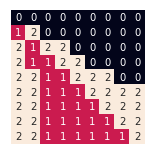

Episode 295	  Score: -229.31
0.22793384675362674


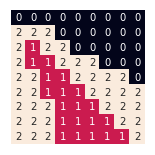

Episode 296	  Score: -212.75
0.22679417751985861


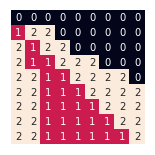

Episode 297	  Score: -233.50
0.22566020663225933


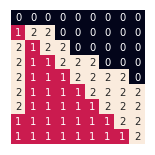

Episode 298	  Score: -201.51
0.22453190559909803


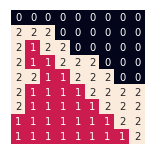

Episode 299	  Score: -183.83
0.22340924607110255


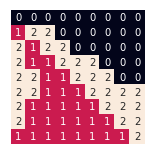

Episode 300	  Score: -197.04
0.22229219984074702


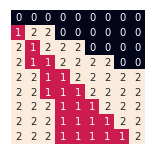

Episode 301	  Score: -254.67
0.2211807388415433


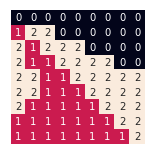

Episode 302	  Score: -224.98
0.22007483514733558


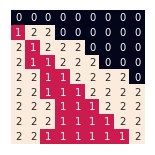

Episode 303	  Score: -205.70
0.2189744609715989


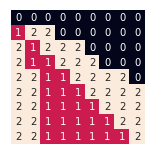

Episode 304	  Score: -269.93
0.2178795886667409


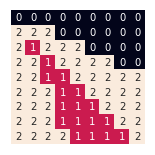

Episode 305	  Score: -276.59
0.2167901907234072


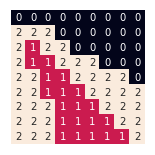

Episode 306	  Score: -221.07
0.21570623976979014


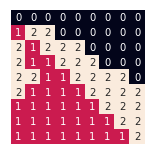

Episode 307	  Score: -278.54
0.21462770857094118


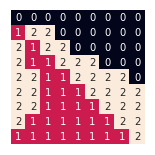

Episode 308	  Score: -238.86
0.21355457002808648


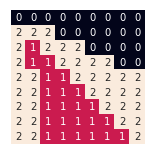

Episode 309	  Score: -226.19
0.21248679717794605


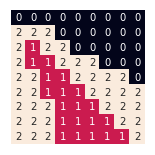

Episode 310	  Score: -220.26
0.21142436319205632


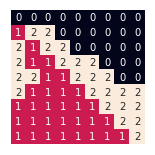

Episode 311	  Score: -188.27
0.21036724137609603


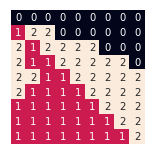

Episode 312	  Score: -248.27
0.20931540516921554


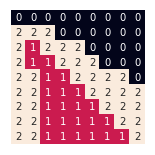

Episode 313	  Score: -275.86
0.20826882814336947


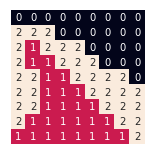

Episode 314	  Score: -220.90
0.20722748400265262


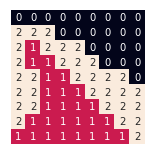

Episode 315	  Score: -210.05
0.20619134658263935


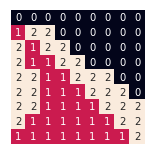

Episode 316	  Score: -229.15
0.20516038984972615


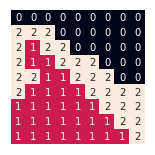

Episode 317	  Score: -206.74
0.2041345879004775


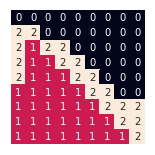

Episode 318	  Score: -239.16
0.2031139149609751


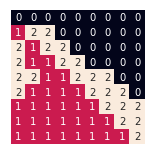

Episode 319	  Score: -230.50
0.20209834538617025


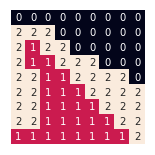

Episode 320	  Score: -194.73
0.2010878536592394


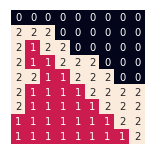

Episode 321	  Score: -176.44
0.2000824143909432


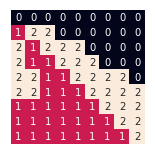

Episode 322	  Score: -311.61
0.19908200231898848


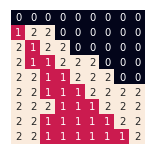

Episode 323	  Score: -179.40
0.19808659230739353


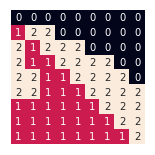

Episode 324	  Score: -204.81
0.19709615934585656


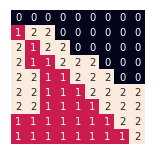

Episode 325	  Score: -182.55
0.19611067854912728


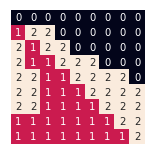

Episode 326	  Score: -210.37
0.19513012515638165


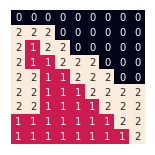

Episode 327	  Score: -169.90
0.19415447453059972


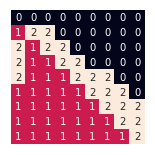

Episode 328	  Score: -223.09
0.19318370215794672


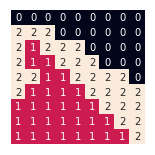

Episode 329	  Score: -225.18
0.192217783647157


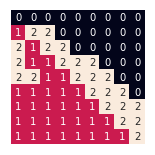

Episode 330	  Score: -186.04
0.1912566947289212


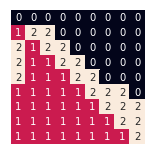

Episode 331	  Score: -194.95
0.1903004112552766


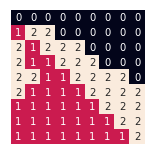

Episode 332	  Score: -203.58
0.18934890919900021


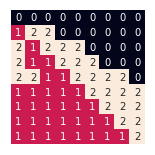

Episode 333	  Score: -184.82
0.18840216465300522


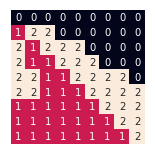

Episode 334	  Score: -176.95
0.18746015382974018


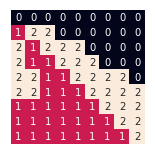

Episode 335	  Score: -195.86
0.1865228530605915


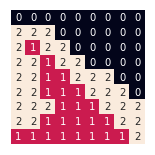

Episode 336	  Score: -135.04
0.18559023879528855


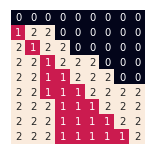

Episode 337	  Score: -180.15
0.1846622876013121


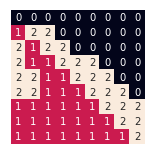

Episode 338	  Score: -164.99
0.18373897616330553


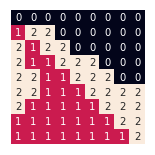

Episode 339	  Score: -237.26
0.182820281282489


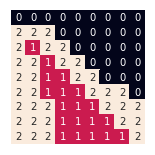

Episode 340	  Score: -139.16
0.18190617987607657


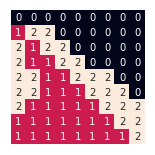

Episode 341	  Score: -149.88
0.18099664897669618


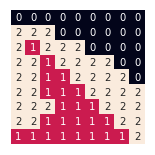

Episode 342	  Score: -189.28
0.1800916657318127


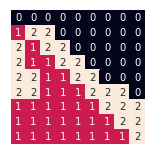

Episode 343	  Score: -228.29
0.17919120740315364


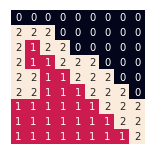

Episode 344	  Score: -191.69
0.17829525136613786


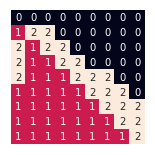

Episode 345	  Score: -182.31
0.17740377510930716


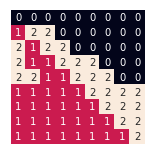

Episode 346	  Score: -151.33
0.17651675623376062


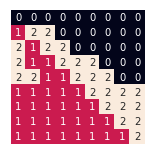

Episode 347	  Score: -190.80
0.1756341724525918


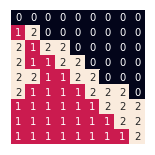

Episode 348	  Score: -219.28
0.17475600159032884


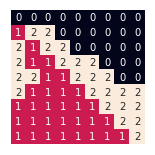

Episode 349	  Score: -200.79
0.17388222158237718


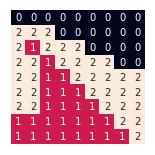

Episode 350	  Score: -174.96
0.1730128104744653


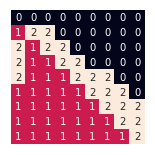

Episode 351	  Score: -177.21
0.17214774642209296


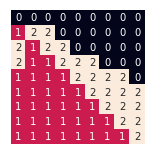

Episode 352	  Score: -218.12
0.1712870076899825


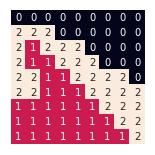

Episode 353	  Score: -144.17
0.17043057265153258


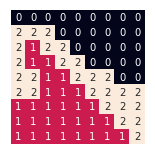

Episode 354	  Score: -139.88
0.16957841978827493


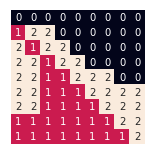

Episode 355	  Score: -231.15
0.16873052768933355


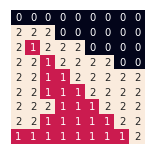

Episode 356	  Score: -134.00
0.1678868750508869


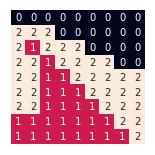

Episode 357	  Score: -189.78
0.16704744067563246


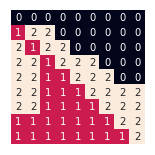

Episode 358	  Score: -128.92
0.1662122034722543


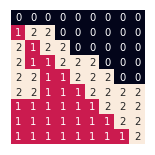

Episode 359	  Score: -165.69
0.16538114245489302


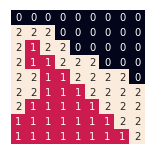

Episode 360	  Score: -189.92
0.16455423674261854


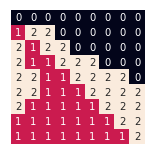

Episode 361	  Score: -165.08
0.16373146555890544


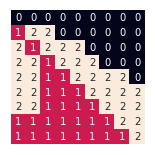

Episode 362	  Score: -178.82
0.16291280823111093


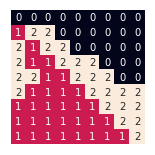

Episode 363	  Score: -171.94
0.16209824418995536


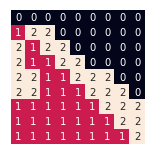

Episode 364	  Score: -156.18
0.16128775296900558


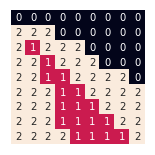

Episode 365	  Score: -137.27
0.16048131420416054


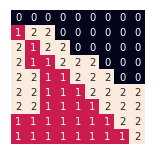

Episode 366	  Score: -173.70
0.15967890763313974


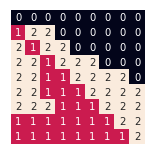

Episode 367	  Score: -143.27
0.15888051309497406


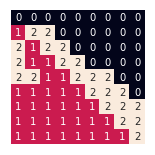

Episode 368	  Score: -163.81
0.1580861105294992


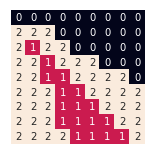

Episode 369	  Score: -172.00
0.1572956799768517


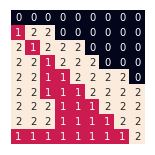

Episode 370	  Score: -159.91
0.15650920157696743


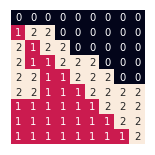

Episode 371	  Score: -151.43
0.1557266555690826


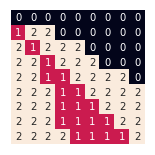

Episode 372	  Score: -181.25
0.1549480222912372


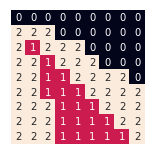

Episode 373	  Score: -216.31
0.15417328217978102


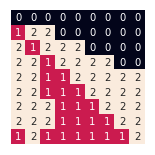

Episode 374	  Score: -178.95
0.1534024157688821


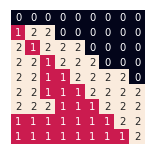

Episode 375	  Score: -117.45
0.1526354036900377


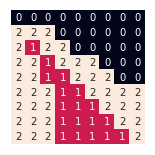

Episode 376	  Score: -162.68
0.1518722266715875


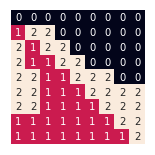

Episode 377	  Score: -173.01
0.15111286553822956


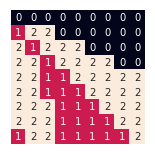

Episode 378	  Score: -125.58
0.15035730121053842


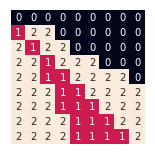

Episode 379	  Score: -163.84
0.14960551470448571


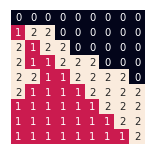

Episode 380	  Score: -109.31
0.14885748713096328


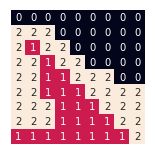

Episode 381	  Score: -167.73
0.14811319969530845


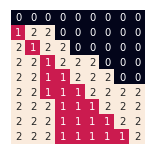

Episode 382	  Score: -191.69
0.1473726336968319


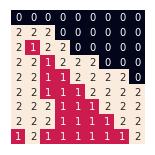

Episode 383	  Score: -142.62
0.14663577052834775


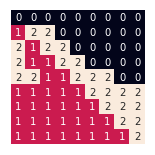

Episode 384	  Score: -147.60
0.14590259167570602


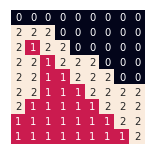

Episode 385	  Score: -153.45
0.1451730787173275


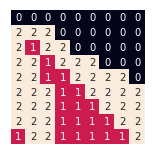

Episode 386	  Score: -208.96
0.14444721332374086


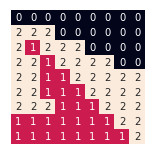

Episode 387	  Score: -149.83
0.14372497725712216


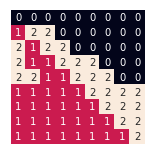

Episode 388	  Score: -116.82
0.14300635237083656


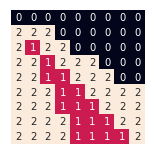

Episode 389	  Score: -154.20
0.14229132060898236


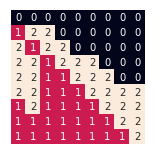

Episode 390	  Score: -150.91
0.14157986400593744


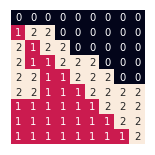

Episode 391	  Score: -125.40
0.14087196468590776


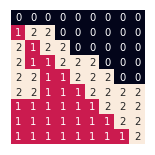

Episode 392	  Score: -154.37
0.14016760486247823


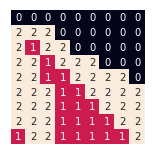

Episode 393	  Score: -208.43
0.13946676683816583


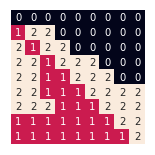

Episode 394	  Score: -121.68
0.138769433003975


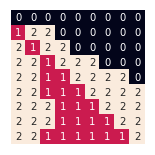

Episode 395	  Score: -145.00
0.13807558583895513


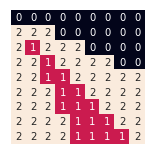

Episode 396	  Score: -100.29
0.13738520790976036


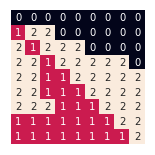

Episode 397	  Score: -162.20
0.13669828187021155


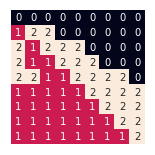

Episode 398	  Score: -178.62
0.13601479046086049


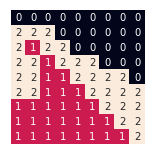

Episode 399	  Score: -177.08
0.1353347165085562


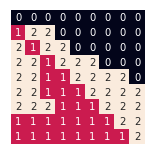

Episode 400	  Score: -127.49
0.1346580429260134


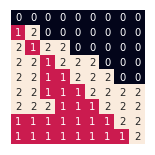

Episode 401	  Score: -113.07
0.13398475271138335


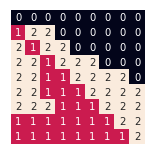

Episode 402	  Score: -108.63
0.13331482894782642


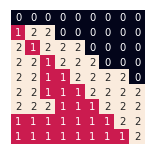

Episode 403	  Score: -193.00
0.13264825480308728


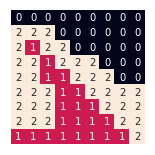

Episode 404	  Score: -189.51
0.13198501352907185


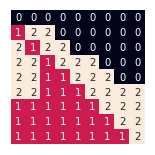

Episode 405	  Score: -141.66
0.1313250884614265


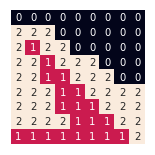

Episode 406	  Score: -168.24
0.13066846301911936


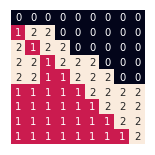

Episode 407	  Score: -141.46
0.13001512070402377


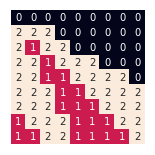

Episode 408	  Score: -166.55
0.12936504510050365


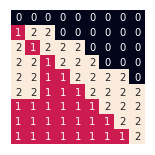

Episode 409	  Score: -148.52
0.12871821987500112


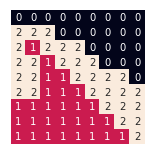

Episode 410	  Score: -138.34
0.12807462877562611


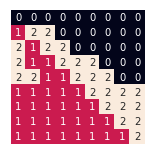

Episode 411	  Score: -127.60
0.12743425563174798


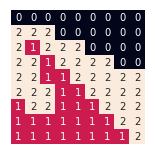

Episode 412	  Score: -141.17
0.12679708435358925


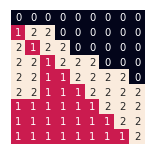

Episode 413	  Score: -150.09
0.1261630989318213


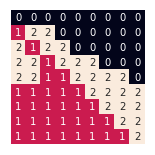

Episode 414	  Score: -78.26
0.1255322834371622


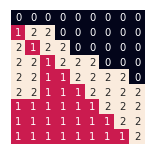

Episode 415	  Score: -147.15
0.12490462201997637


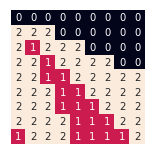

Episode 416	  Score: -132.87
0.1242800989098765


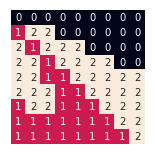

Episode 417	  Score: -122.46
0.12365869841532712


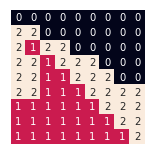

Episode 418	  Score: -139.30
0.12304040492325048


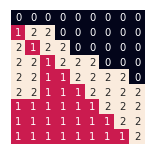

Episode 419	  Score: -150.31
0.12242520289863423


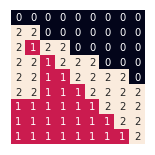

Episode 420	  Score: -124.52
0.12181307688414106


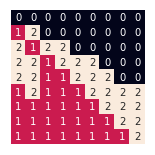

Episode 421	  Score: -190.85
0.12120401149972035


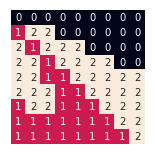

Episode 422	  Score: -147.92
0.12059799144222175


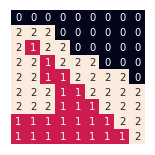

Episode 423	  Score: -109.16
0.11999500148501063


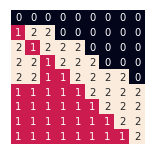

Episode 424	  Score: -84.95
0.11939502647758558


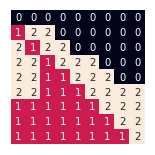

Episode 425	  Score: -121.15
0.11879805134519765


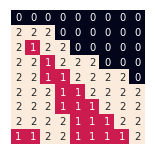

Episode 426	  Score: -145.74
0.11820406108847166


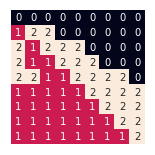

Episode 427	  Score: -124.05
0.1176130407830293


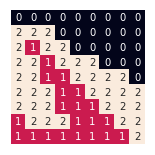

Episode 428	  Score: -144.54
0.11702497557911415


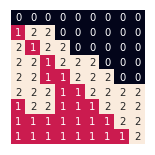

Episode 429	  Score: -157.64
0.11643985070121858


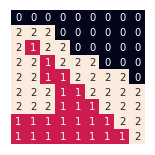

Episode 430	  Score: -106.19
0.11585765144771248


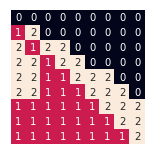

Episode 431	  Score: -115.36
0.11527836319047392


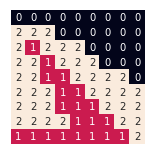

Episode 432	  Score: -80.79
0.11470197137452155


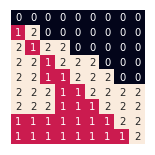

Episode 433	  Score: -106.21
0.11412846151764894


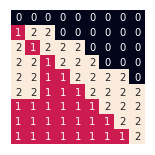

Episode 434	  Score: -143.54
0.1135578192100607


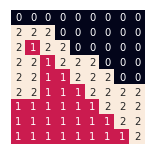

Episode 435	  Score: -133.28
0.11299003011401039


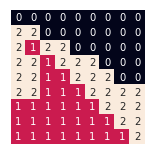

Episode 436	  Score: -118.51
0.11242507996344034


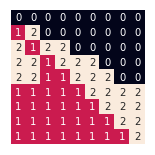

Episode 437	  Score: -163.20
0.11186295456362313


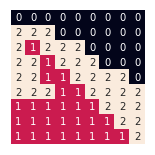

Episode 438	  Score: -123.00
0.11130363979080501


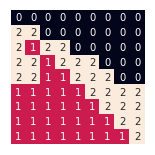

Episode 439	  Score: -143.93
0.11074712159185099


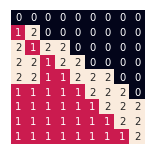

Episode 440	  Score: -101.73
0.11019338598389174


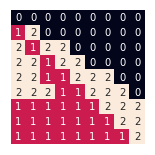

Episode 441	  Score: -53.20
0.10964241905397228


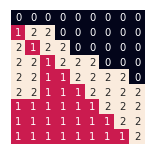

Episode 442	  Score: -107.50
0.10909420695870241


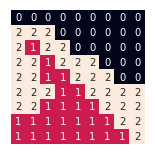

Episode 443	  Score: -96.69
0.1085487359239089


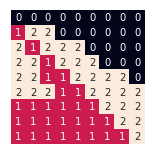

Episode 444	  Score: -111.05
0.10800599224428936


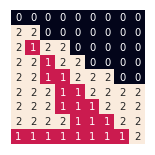

Episode 445	  Score: -120.24
0.10746596228306791


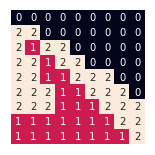

Episode 446	  Score: -111.13
0.10692863247165257


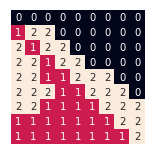

Episode 447	  Score: -76.73
0.1063939893092943


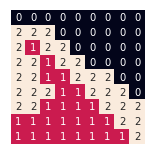

Episode 448	  Score: -105.77
0.10586201936274783


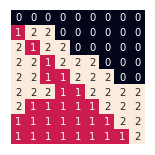

Episode 449	  Score: -103.76
0.10533270926593409


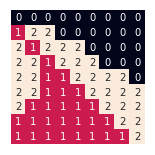

Episode 450	  Score: -107.85
0.10480604571960442


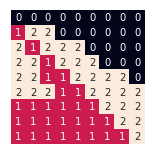

Episode 451	  Score: -109.74
0.1042820154910064


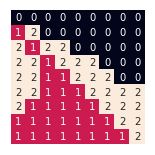

Episode 452	  Score: -85.45
0.10376060541355137


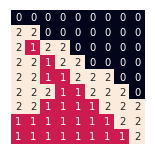

Episode 453	  Score: -119.24
0.1032418023864836


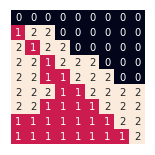

Episode 454	  Score: -119.16
0.10272559337455119


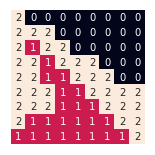

Episode 455	  Score: -60.94
0.10221196540767843


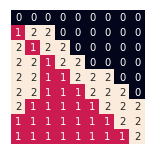

Episode 456	  Score: -88.18
0.10170090558064004


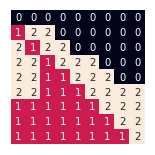

Episode 457	  Score: -64.39
0.10119240105273684


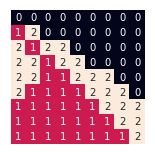

Episode 458	  Score: -144.07
0.10068643904747315


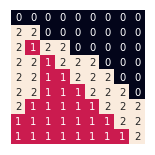

Episode 459	  Score: -92.29
0.10018300685223579


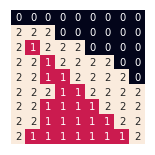

Episode 460	  Score: -127.79
0.1


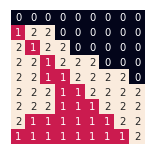

Episode 461	  Score: -92.04
0.1


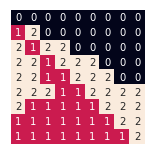

Episode 462	  Score: -93.18
0.1


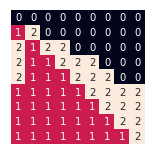

Episode 463	  Score: -139.28
0.1


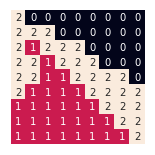

Episode 464	  Score: -107.16
0.1


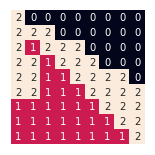

Episode 465	  Score: -81.92
0.1


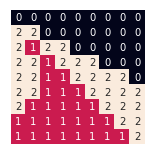

Episode 466	  Score: -121.38
0.1


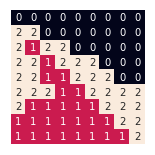

Episode 467	  Score: -106.45
0.1


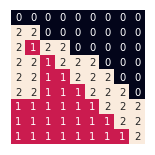

Episode 468	  Score: -94.55
0.1


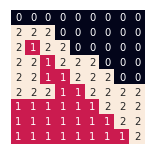

Episode 469	  Score: -74.66
0.1


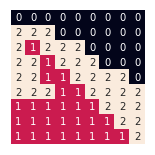

Episode 470	  Score: -101.45
0.1


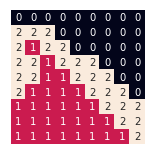

Episode 471	  Score: -108.08
0.1


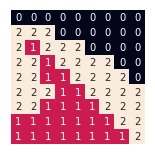

Episode 472	  Score: -119.61
0.1


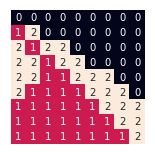

Episode 473	  Score: -120.10
0.1


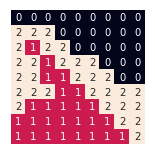

Episode 474	  Score: -101.12
0.1


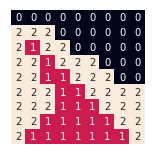

Episode 475	  Score: -98.06
0.1


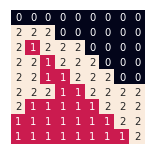

Episode 476	  Score: -88.75
0.1


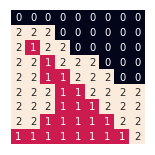

Episode 477	  Score: -91.47
0.1


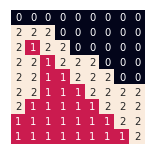

Episode 478	  Score: -162.00
0.1


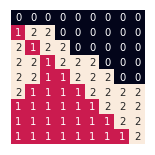

Episode 479	  Score: -59.07
0.1


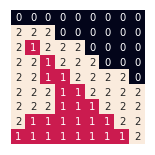

Episode 480	  Score: -106.77
0.1


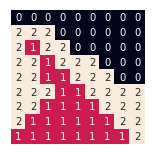

Episode 481	  Score: -75.39
0.1


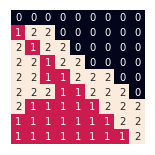

Episode 482	  Score: -92.97
0.1


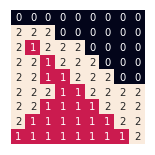

Episode 483	  Score: -122.30
0.1


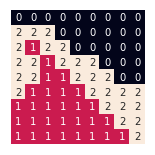

Episode 484	  Score: -104.93
0.1


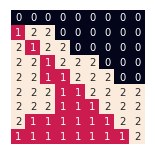

Episode 485	  Score: -163.57
0.1


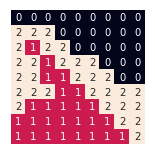

Episode 486	  Score: -130.18
0.1


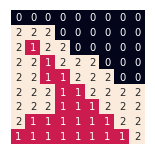

Episode 487	  Score: -114.89
0.1


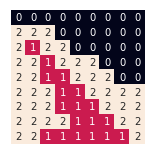

Episode 488	  Score: -102.25
0.1


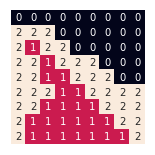

Episode 489	  Score: -71.01
0.1


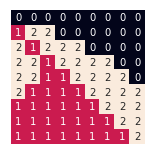

Episode 490	  Score: -140.68
0.1


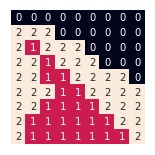

Episode 491	  Score: -116.00
0.1


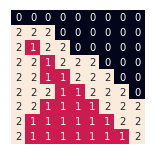

Episode 492	  Score: -119.55
0.1


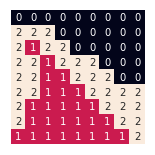

Episode 493	  Score: -42.53
0.1


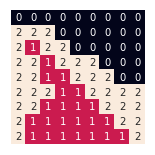

Episode 494	  Score: -129.35
0.1


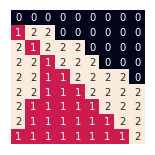

Episode 495	  Score: -92.79
0.1


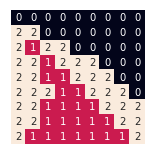

Episode 496	  Score: -128.03
0.1


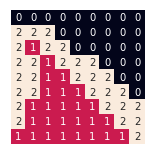

Episode 497	  Score: -125.24
0.1


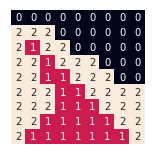

Episode 498	  Score: -146.29
0.1


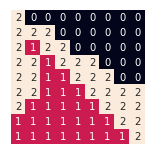

Episode 499	  Score: -130.38
0.1


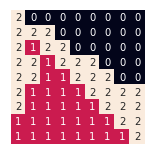

Episode 500	  Score: -117.84
0.1


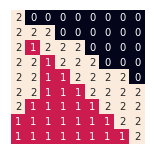

Episode 501	  Score: -84.68
0.1


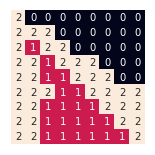

Episode 502	  Score: -124.59
0.1


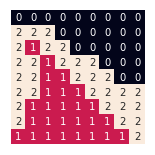

Episode 503	  Score: -164.63
0.1


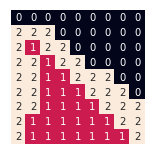

Episode 504	  Score: -69.29
0.1


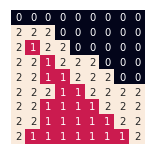

Episode 505	  Score: -112.10
0.1


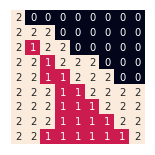

Episode 506	  Score: -146.36
0.1


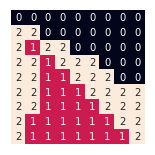

Episode 507	  Score: -77.29
0.1


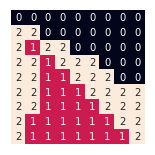

Episode 508	  Score: -93.95
0.1


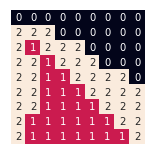

Episode 509	  Score: -82.36
0.1


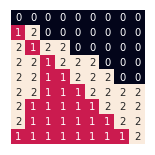

Episode 510	  Score: -107.85
0.1


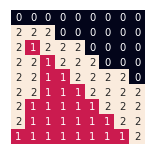

Episode 511	  Score: -63.71
0.1


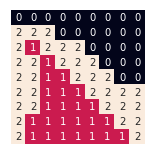

Episode 512	  Score: -138.10
0.1


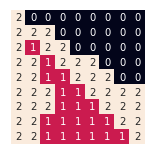

Episode 513	  Score: -98.77
0.1


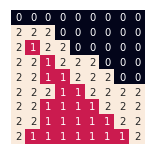

Episode 514	  Score: -109.21
0.1


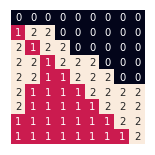

Episode 515	  Score: -75.70
0.1


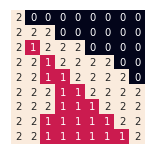

Episode 516	  Score: -111.03
0.1


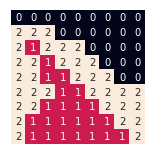

Episode 517	  Score: -137.77
0.1


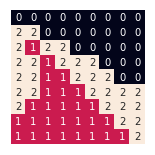

Episode 518	  Score: -109.27
0.1


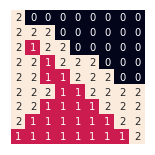

Episode 519	  Score: -72.43
0.1


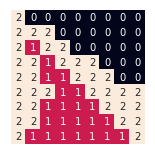

Episode 520	  Score: -116.70
0.1


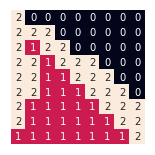

Episode 521	  Score: -124.05
0.1


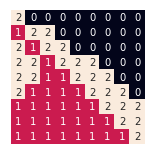

Episode 522	  Score: -96.47
0.1


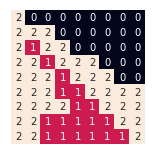

Episode 523	  Score: -109.80
0.1


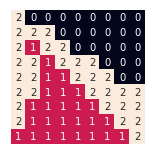

Episode 524	  Score: -123.18
0.1


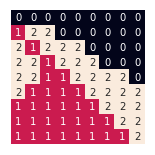

Episode 525	  Score: -72.22
0.1


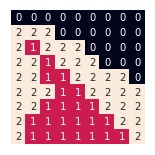

Episode 526	  Score: -73.04
0.1


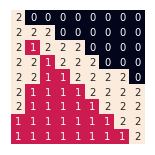

Episode 527	  Score: -94.08
0.1


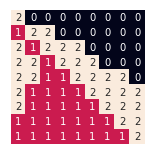

Episode 528	  Score: -126.18
0.1


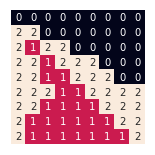

Episode 529	  Score: -165.58
0.1


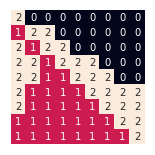

Episode 530	  Score: -87.06
0.1


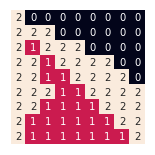

Episode 531	  Score: -80.29
0.1


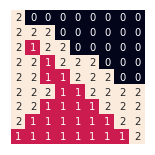

Episode 532	  Score: -127.42
0.1


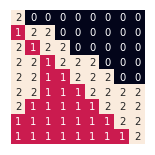

Episode 533	  Score: -122.62
0.1


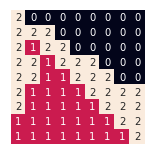

Episode 534	  Score: -130.86
0.1


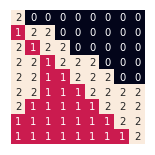

Episode 535	  Score: -95.43
0.1


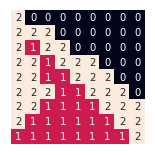

Episode 536	  Score: -112.08
0.1


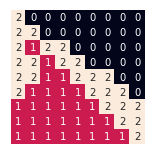

Episode 537	  Score: -121.23
0.1


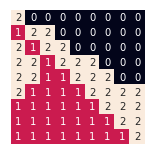

Episode 538	  Score: -137.85
0.1


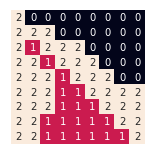

Episode 539	  Score: -65.94
0.1


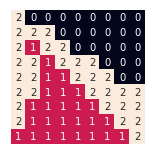

Episode 540	  Score: -57.40
0.1


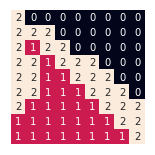

Episode 541	  Score: -96.84
0.1


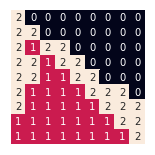

Episode 542	  Score: -93.60
0.1


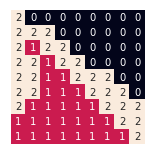

Episode 543	  Score: -100.41
0.1


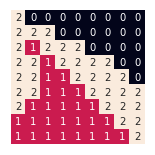

Episode 544	  Score: -120.44
0.1


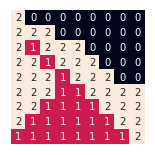

Episode 545	  Score: -114.55
0.1


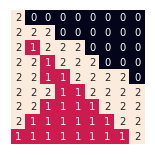

Episode 546	  Score: -130.70
0.1


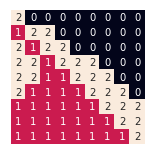

Episode 547	  Score: -63.94
0.1


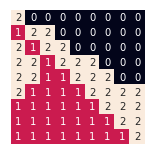

Episode 548	  Score: -136.37
0.1


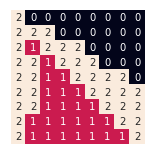

Episode 549	  Score: -107.79
0.1


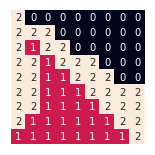

Episode 550	  Score: -133.66
0.1


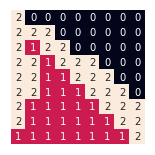

Episode 551	  Score: -124.12
0.1


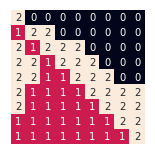

Episode 552	  Score: -162.96
0.1


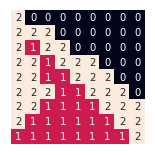

Episode 553	  Score: -101.54
0.1


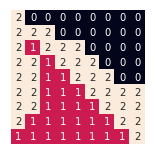

Episode 554	  Score: -148.75
0.1


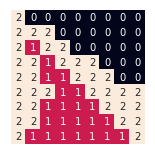

Episode 555	  Score: -62.16
0.1


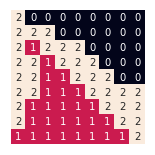

Episode 556	  Score: -109.77
0.1


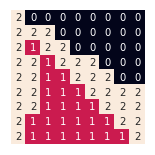

Episode 557	  Score: -134.37
0.1


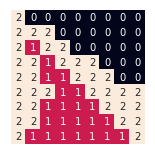

Episode 558	  Score: -120.79
0.1


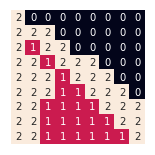

Episode 559	  Score: -126.73
0.1


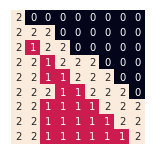

Episode 560	  Score: -89.77
0.1


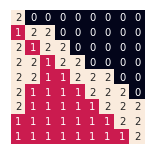

Episode 561	  Score: -126.29
0.1


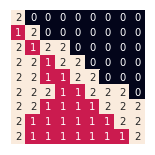

Episode 562	  Score: -104.52
0.1


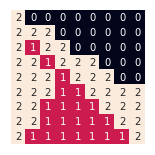

Episode 563	  Score: -80.11
0.1


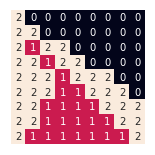

Episode 564	  Score: -118.08
0.1


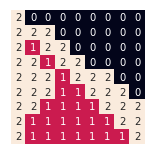

Episode 565	  Score: -152.71
0.1


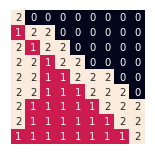

Episode 566	  Score: -169.04
0.1


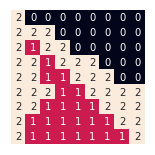

Episode 567	  Score: -67.89
0.1


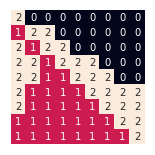

Episode 568	  Score: -102.05
0.1


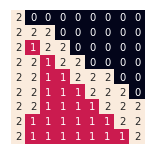

Episode 569	  Score: -128.75
0.1


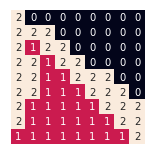

Episode 570	  Score: -141.09
0.1


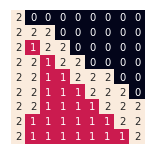

Episode 571	  Score: -73.73
0.1


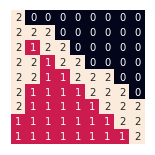

Episode 572	  Score: -62.72
0.1


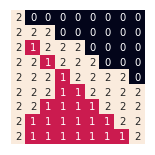

Episode 573	  Score: -164.42
0.1


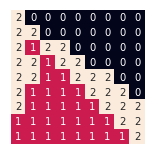

Episode 574	  Score: -93.33
0.1


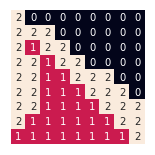

Episode 575	  Score: -131.59
0.1


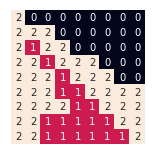

Episode 576	  Score: -127.78
0.1


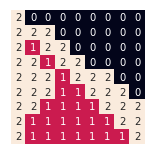

Episode 577	  Score: -86.48
0.1


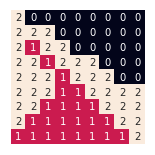

Episode 578	  Score: -74.27
0.1


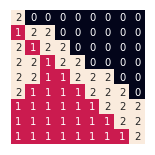

Episode 579	  Score: -142.85
0.1


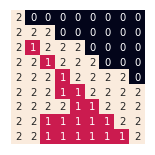

Episode 580	  Score: -102.71
0.1


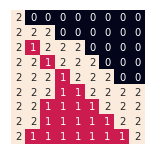

Episode 581	  Score: -81.84
0.1


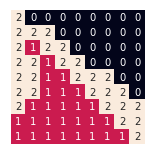

Episode 582	  Score: -146.66
0.1


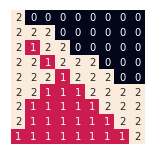

Episode 583	  Score: -87.45
0.1


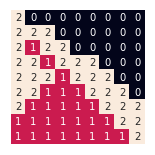

Episode 584	  Score: -102.27
0.1


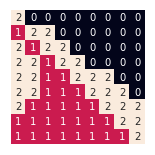

Episode 585	  Score: -106.91
0.1


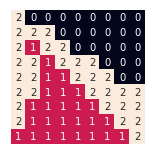

Episode 586	  Score: -116.31
0.1


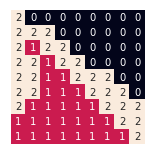

Episode 587	  Score: -121.75
0.1


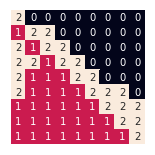

Episode 588	  Score: -125.31
0.1


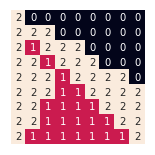

Episode 589	  Score: -119.84
0.1


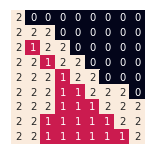

Episode 590	  Score: -121.59
0.1


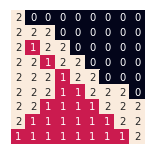

Episode 591	  Score: -103.46
0.1


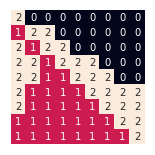

Episode 592	  Score: -74.36
0.1


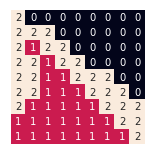

Episode 593	  Score: -128.91
0.1


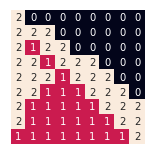

Episode 594	  Score: -164.71
0.1


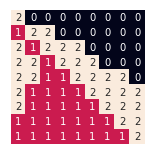

Episode 595	  Score: -103.78
0.1


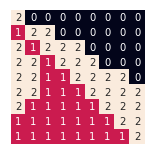

Episode 596	  Score: -116.26
0.1


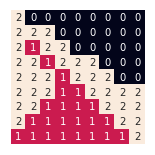

Episode 597	  Score: -86.35
0.1


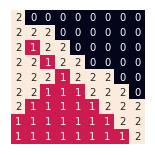

Episode 598	  Score: -51.55
0.1


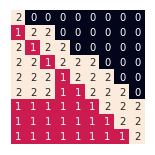

Episode 599	  Score: -67.91
0.1


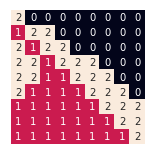

Episode 600	  Score: -119.85
0.1


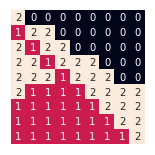

Episode 601	  Score: -146.12
0.1


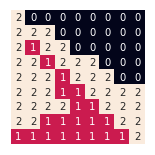

Episode 602	  Score: -125.21
0.1


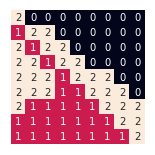

Episode 603	  Score: -150.94
0.1


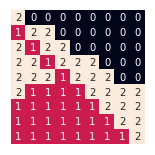

Episode 604	  Score: -49.40
0.1


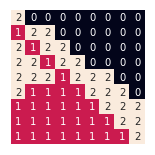

Episode 605	  Score: -141.11
0.1


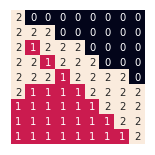

Episode 606	  Score: -106.53
0.1


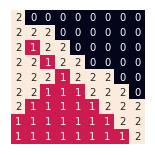

Episode 607	  Score: -107.30
0.1


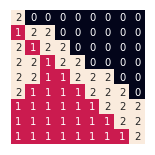

Episode 608	  Score: -101.89
0.1


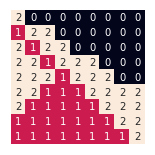

Episode 609	  Score: -96.65
0.1


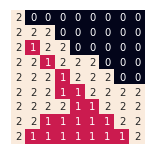

Episode 610	  Score: -139.76
0.1


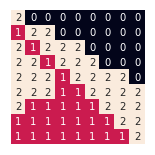

Episode 611	  Score: -99.46
0.1


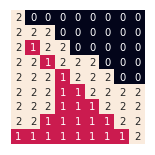

Episode 612	  Score: -88.27
0.1


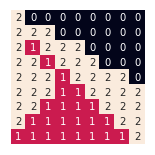

Episode 613	  Score: -119.95
0.1


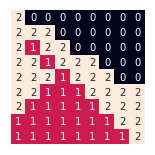

Episode 614	  Score: -129.37
0.1


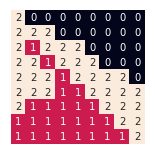

Episode 615	  Score: -116.34
0.1


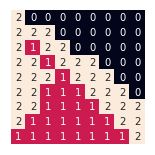

Episode 616	  Score: -103.57
0.1


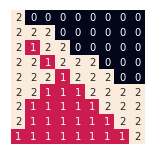

Episode 617	  Score: -109.05
0.1


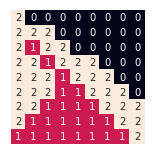

Episode 618	  Score: -116.57
0.1


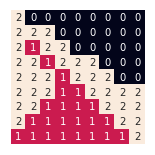

Episode 619	  Score: -56.54
0.1


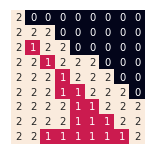

Episode 620	  Score: -111.20
0.1


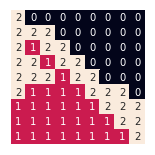

Episode 621	  Score: -78.17
0.1


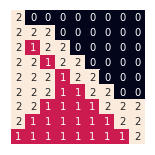

Episode 622	  Score: -121.14
0.1


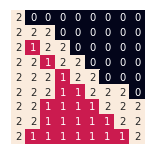

Episode 623	  Score: -126.14
0.1


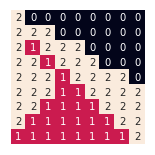

Episode 624	  Score: -84.97
0.1


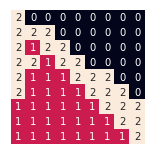

Episode 625	  Score: -102.52
0.1


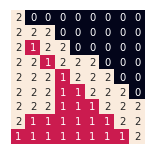

Episode 626	  Score: -128.88
0.1


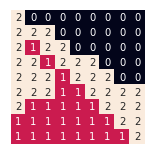

Episode 627	  Score: -116.80
0.1


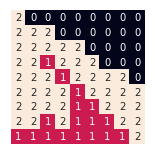

Episode 628	  Score: -111.68
0.1


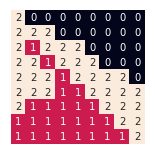

Episode 629	  Score: -121.90
0.1


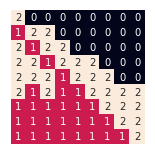

Episode 630	  Score: -94.75
0.1


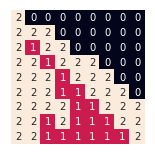

Episode 631	  Score: -105.95
0.1


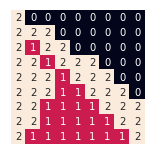

Episode 632	  Score: -122.70
0.1


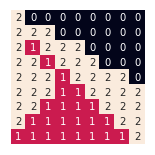

Episode 633	  Score: -98.04
0.1


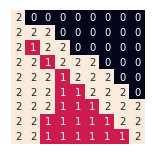

Episode 634	  Score: -138.61
0.1


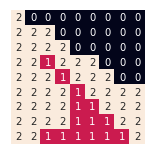

Episode 635	  Score: -154.12
0.1


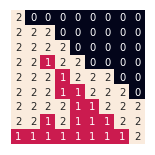

Episode 636	  Score: -110.45
0.1


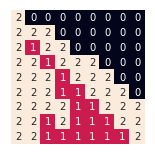

Episode 637	  Score: -134.27
0.1


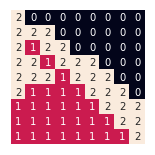

Episode 638	  Score: -105.34
0.1


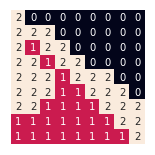

Episode 639	  Score: -123.75
0.1


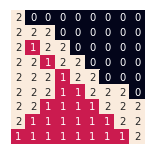

Episode 640	  Score: -113.76
0.1


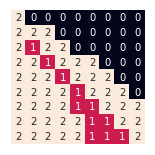

Episode 641	  Score: -85.92
0.1


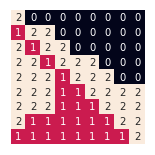

Episode 642	  Score: -87.16
0.1


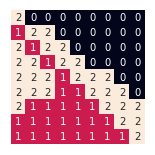

Episode 643	  Score: -102.88
0.1


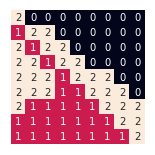

Episode 644	  Score: -61.99
0.1


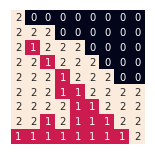

Episode 645	  Score: -87.65
0.1


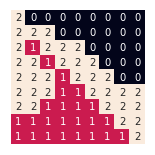

Episode 646	  Score: -150.31
0.1


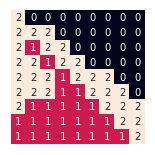

Episode 647	  Score: -103.07
0.1


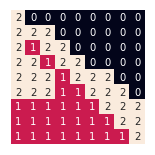

Episode 648	  Score: -91.43
0.1


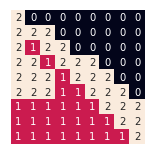

Episode 649	  Score: -26.93
0.1


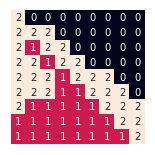

Episode 650	  Score: -91.19
0.1


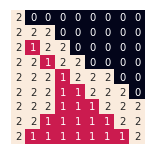

Episode 651	  Score: -117.67
0.1


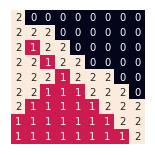

Episode 652	  Score: -112.44
0.1


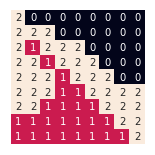

Episode 653	  Score: -91.01
0.1


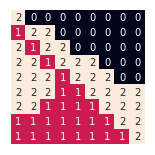

Episode 654	  Score: -142.55
0.1


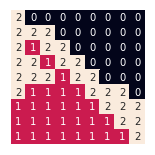

Episode 655	  Score: -93.01
0.1


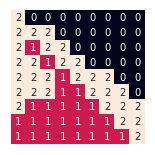

Episode 656	  Score: -106.90
0.1


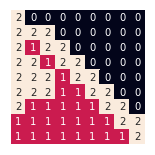

Episode 657	  Score: -90.61
0.1


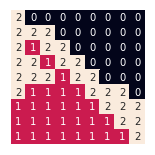

Episode 658	  Score: -164.62
0.1


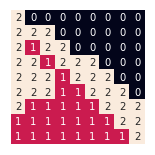

Episode 659	  Score: -133.48
0.1


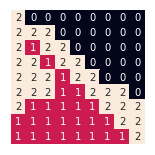

Episode 660	  Score: -111.35
0.1


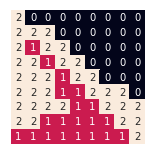

Episode 661	  Score: -82.31
0.1


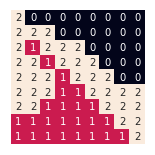

Episode 662	  Score: -84.30
0.1


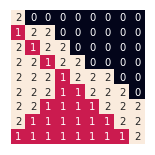

Episode 663	  Score: -96.02
0.1


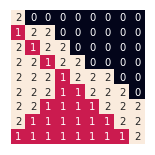

Episode 664	  Score: -116.03
0.1


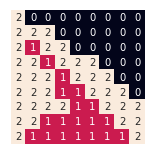

Episode 665	  Score: -117.11
0.1


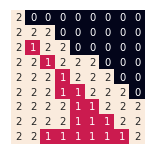

Episode 666	  Score: -95.79
0.1


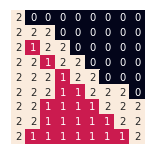

Episode 667	  Score: -113.55
0.1


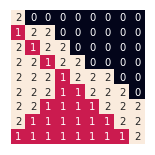

Episode 668	  Score: -104.08
0.1


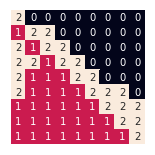

Episode 669	  Score: -122.59
0.1


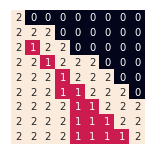

Episode 670	  Score: -117.93
0.1


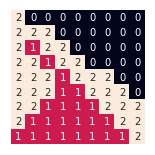

Episode 671	  Score: -166.87
0.1


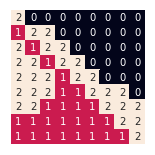

Episode 672	  Score: -131.79
0.1


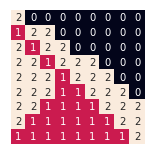

Episode 673	  Score: -145.56
0.1


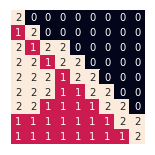

Episode 674	  Score: -113.18
0.1


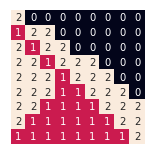

Episode 675	  Score: -78.08
0.1


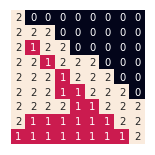

Episode 676	  Score: -170.76
0.1


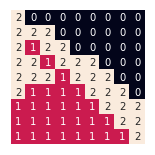

Episode 677	  Score: -110.02
0.1


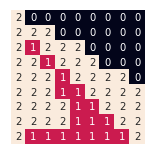

Episode 678	  Score: -87.04
0.1


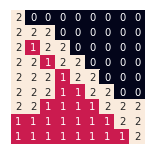

Episode 679	  Score: -111.96
0.1


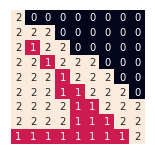

Episode 680	  Score: -124.33
0.1


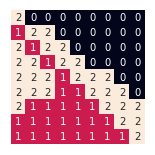

Episode 681	  Score: -158.06
0.1


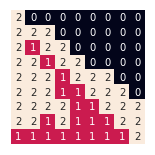

Episode 682	  Score: -146.41
0.1


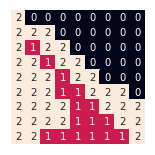

Episode 683	  Score: -97.65
0.1


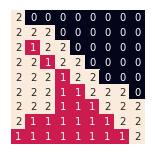

Episode 684	  Score: -113.42
0.1


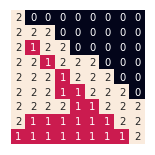

Episode 685	  Score: -129.04
0.1


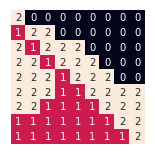

Episode 686	  Score: -146.04
0.1


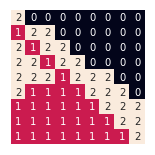

Episode 687	  Score: -112.59
0.1


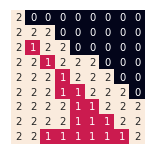

Episode 688	  Score: -105.99
0.1


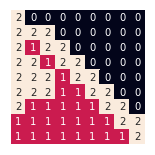

Episode 689	  Score: -94.45
0.1


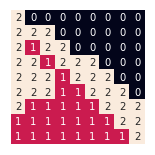

Episode 690	  Score: -111.29
0.1


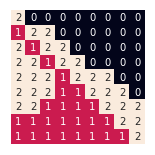

Episode 691	  Score: -106.35
0.1


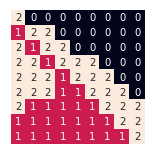

Episode 692	  Score: -43.28
0.1


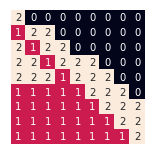

Episode 693	  Score: -108.13
0.1


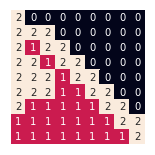

Episode 694	  Score: -149.97
0.1


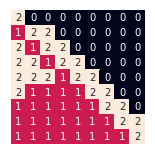

Episode 695	  Score: -131.57
0.1


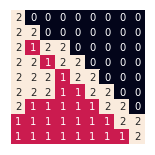

Episode 696	  Score: -96.99
0.1


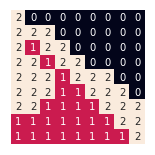

Episode 697	  Score: -133.08
0.1


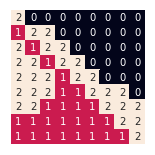

Episode 698	  Score: -108.13
0.1


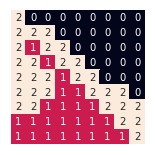

Episode 699	  Score: -119.08
0.1


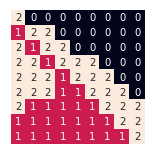

Episode 700	  Score: -86.72
0.1


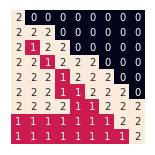

Episode 701	  Score: -77.46
0.1


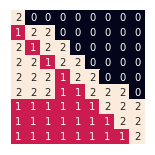

Episode 702	  Score: -79.99
0.1


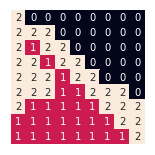

Episode 703	  Score: -110.97
0.1


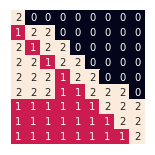

Episode 704	  Score: -71.59
0.1


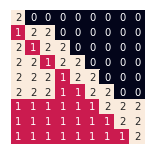

Episode 705	  Score: -111.26
0.1


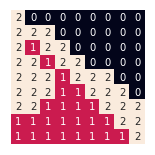

Episode 706	  Score: -72.12
0.1


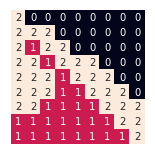

Episode 707	  Score: -107.79
0.1


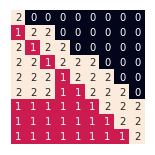

Episode 708	  Score: -138.68
0.1


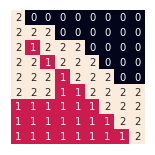

Episode 709	  Score: -91.86
0.1


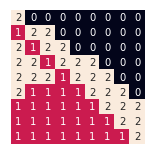

Episode 710	  Score: -155.17
0.1


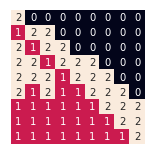

Episode 711	  Score: -137.68
0.1


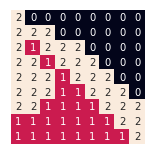

Episode 712	  Score: -113.00
0.1


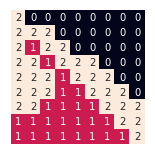

Episode 713	  Score: -78.95
0.1


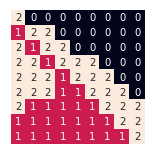

Episode 714	  Score: -83.95
0.1


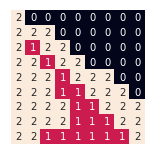

Episode 715	  Score: -81.79
0.1


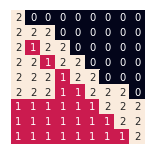

Episode 716	  Score: -114.94
0.1


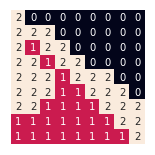

Episode 717	  Score: -90.70
0.1


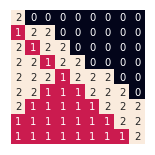

Episode 718	  Score: -107.66
0.1


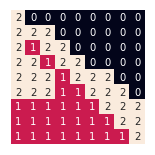

Episode 719	  Score: -131.69
0.1


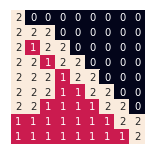

Episode 720	  Score: -103.51
0.1


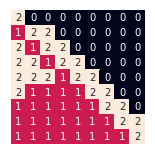

Episode 721	  Score: -115.95
0.1


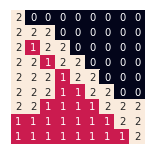

Episode 722	  Score: -101.28
0.1


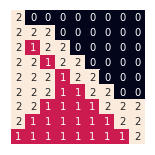

Episode 723	  Score: -107.56
0.1


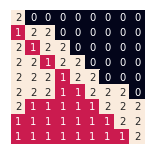

Episode 724	  Score: -123.93
0.1


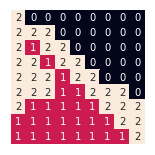

Episode 725	  Score: -103.58
0.1


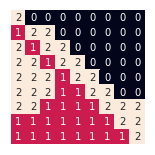

Episode 726	  Score: -114.62
0.1


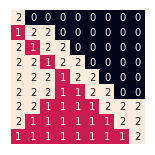

Episode 727	  Score: -157.24
0.1


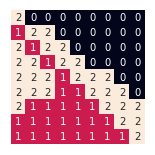

Episode 728	  Score: -152.96
0.1


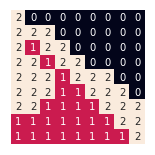

Episode 729	  Score: -65.71
0.1


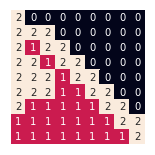

Episode 730	  Score: -122.21
0.1


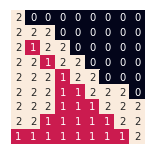

Episode 731	  Score: -54.99
0.1


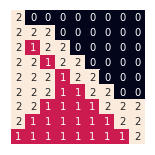

Episode 732	  Score: -97.21
0.1


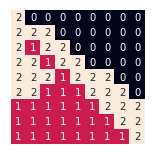

Episode 733	  Score: -120.94
0.1


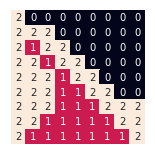

Episode 734	  Score: -141.29
0.1


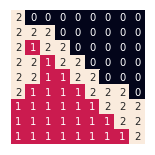

Episode 735	  Score: -107.83
0.1


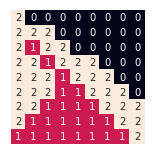

Episode 736	  Score: -177.79
0.1


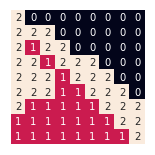

Episode 737	  Score: -98.69
0.1


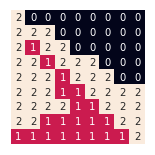

Episode 738	  Score: -131.46
0.1


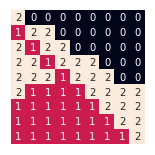

Episode 739	  Score: -88.17
0.1


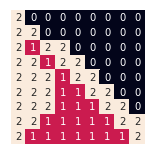

Episode 740	  Score: -128.25
0.1


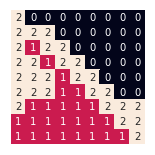

Episode 741	  Score: -131.57
0.1


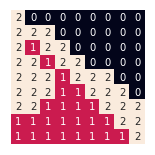

Episode 742	  Score: -81.69
0.1


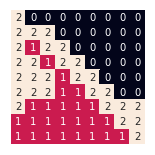

Episode 743	  Score: -112.27
0.1


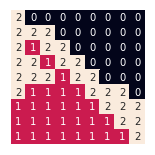

Episode 744	  Score: -57.87
0.1


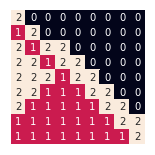

Episode 745	  Score: -92.36
0.1


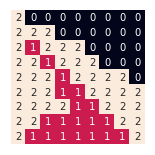

Episode 746	  Score: -168.46
0.1


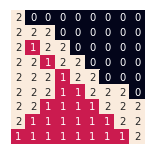

Episode 747	  Score: -130.17
0.1


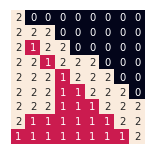

Episode 748	  Score: -144.08
0.1


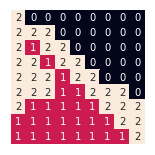

Episode 749	  Score: -129.94
0.1


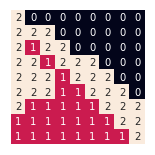

Episode 750	  Score: -158.99
0.1


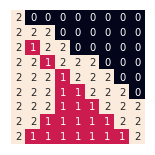

Episode 751	  Score: -88.81
0.1


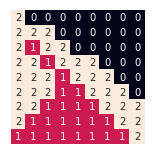

Episode 752	  Score: -134.20
0.1


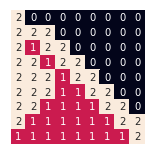

Episode 753	  Score: -166.84
0.1


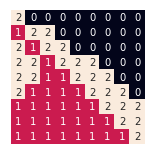

Episode 754	  Score: -114.80
0.1


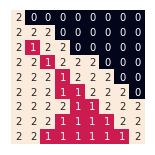

Episode 755	  Score: -127.47
0.1


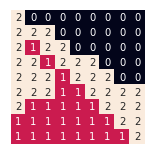

Episode 756	  Score: -145.25
0.1


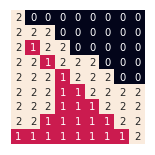

Episode 757	  Score: -100.93
0.1


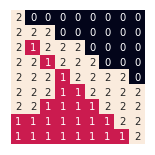

Episode 758	  Score: -153.84
0.1


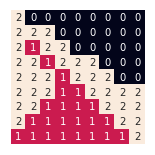

Episode 759	  Score: -106.21
0.1


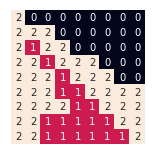

Episode 760	  Score: -84.85
0.1


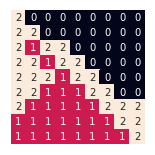

Episode 761	  Score: -132.53
0.1


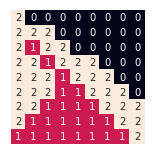

Episode 762	  Score: -64.40
0.1


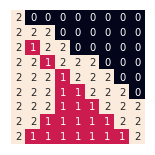

Episode 763	  Score: -69.70
0.1


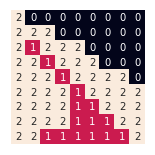

Episode 764	  Score: -144.47
0.1


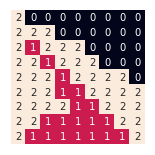

Episode 765	  Score: -163.43
0.1


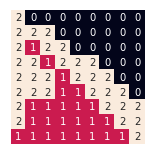

Episode 766	  Score: -90.23
0.1


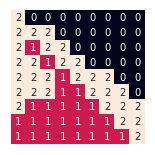

Episode 767	  Score: -87.27
0.1


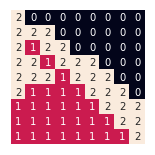

Episode 768	  Score: -140.18
0.1


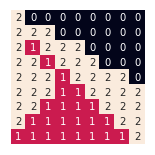

Episode 769	  Score: -109.32
0.1


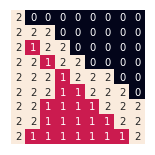

Episode 770	  Score: -123.04
0.1


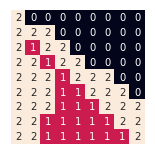

Episode 771	  Score: -80.22
0.1


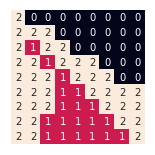

Episode 772	  Score: -88.52
0.1


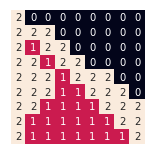

Episode 773	  Score: -111.97
0.1


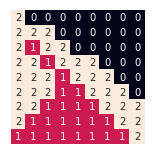

Episode 774	  Score: -88.09
0.1


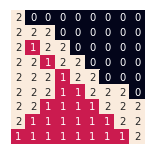

Episode 775	  Score: -53.06
0.1


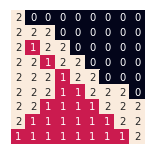

Episode 776	  Score: -83.12
0.1


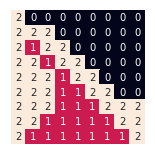

Episode 777	  Score: -95.19
0.1


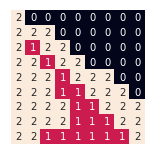

Episode 778	  Score: -158.08
0.1


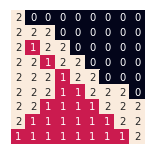

Episode 779	  Score: -154.57
0.1


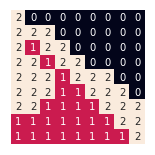

Episode 780	  Score: -128.73
0.1


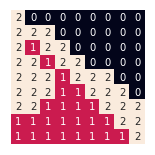

Episode 781	  Score: -131.53
0.1


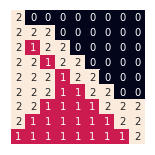

Episode 782	  Score: -130.29
0.1


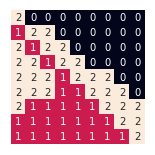

Episode 783	  Score: -78.48
0.1


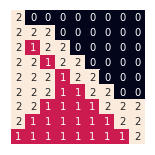

Episode 784	  Score: -84.81
0.1


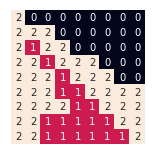

Episode 785	  Score: -95.05
0.1


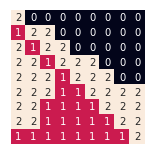

Episode 786	  Score: -112.20
0.1


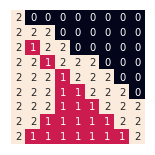

Episode 787	  Score: -100.12
0.1


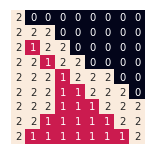

Episode 788	  Score: -102.60
0.1


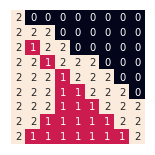

Episode 789	  Score: -96.76
0.1


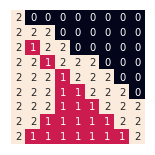

Episode 790	  Score: -64.32
0.1


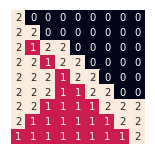

Episode 791	  Score: -93.25
0.1


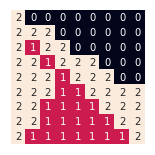

Episode 792	  Score: -64.43
0.1


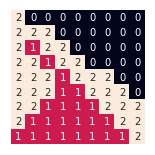

Episode 793	  Score: -116.01
0.1


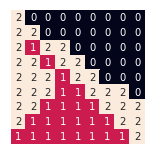

Episode 794	  Score: -130.85
0.1


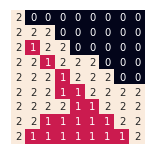

Episode 795	  Score: -137.88
0.1


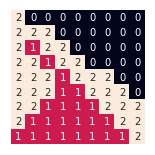

Episode 796	  Score: -94.64
0.1


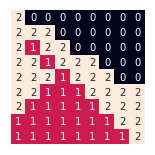

Episode 797	  Score: -98.32
0.1


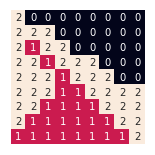

Episode 798	  Score: -131.94
0.1


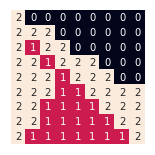

Episode 799	  Score: -58.72
0.1


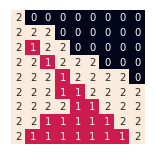

Episode 800	  Score: -108.01
0.1


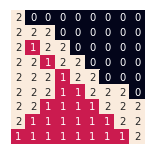

Episode 801	  Score: -76.10
0.1


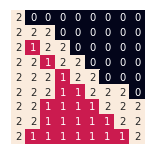

Episode 802	  Score: -90.93
0.1


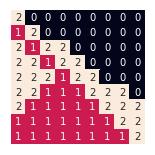

Episode 803	  Score: -81.67
0.1


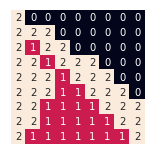

Episode 804	  Score: -129.65
0.1


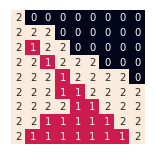

Episode 805	  Score: -93.59
0.1


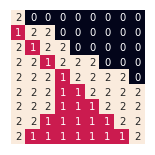

Episode 806	  Score: -121.46
0.1


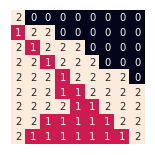

Episode 807	  Score: -93.19
0.1


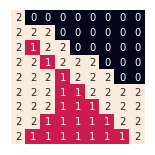

Episode 808	  Score: -121.61
0.1


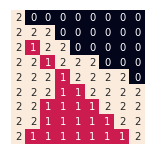

Episode 809	  Score: -94.45
0.1


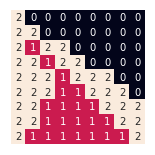

Episode 810	  Score: -128.70
0.1


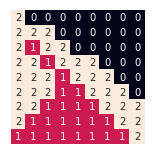

Episode 811	  Score: -101.40
0.1


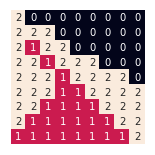

Episode 812	  Score: -78.74
0.1


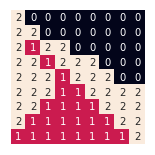

Episode 813	  Score: -127.95
0.1


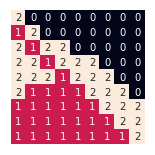

Episode 814	  Score: -81.77
0.1


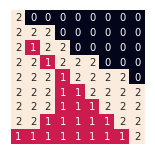

Episode 815	  Score: -63.41
0.1


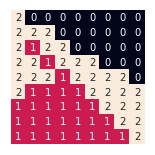

Episode 816	  Score: -81.83
0.1


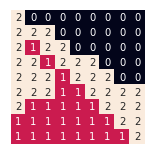

Episode 817	  Score: -89.50
0.1


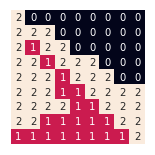

Episode 818	  Score: -116.36
0.1


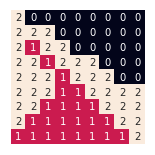

Episode 819	  Score: -109.02
0.1


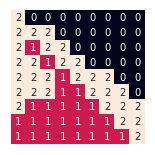

Episode 820	  Score: -120.53
0.1


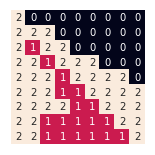

Episode 821	  Score: -123.23
0.1


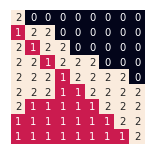

Episode 822	  Score: -112.91
0.1


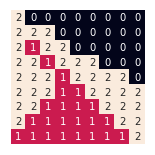

Episode 823	  Score: -159.57
0.1


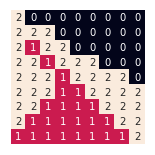

Episode 824	  Score: -119.36
0.1


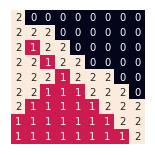

Episode 825	  Score: -94.27
0.1


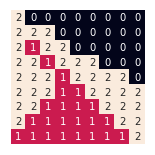

Episode 826	  Score: -63.53
0.1


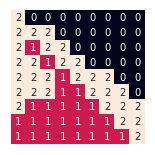

Episode 827	  Score: -122.74
0.1


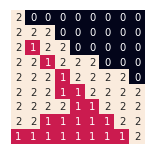

Episode 828	  Score: -154.71
0.1


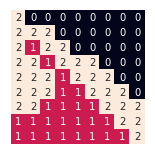

Episode 829	  Score: -113.21
0.1


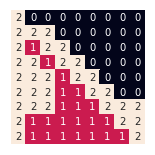

Episode 830	  Score: -121.39
0.1


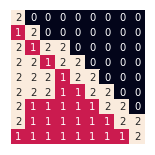

Episode 831	  Score: -110.63
0.1


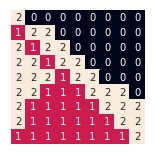

Episode 832	  Score: -151.44
0.1


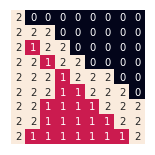

Episode 833	  Score: -104.46
0.1


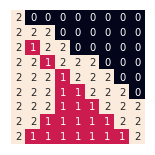

Episode 834	  Score: -135.85
0.1


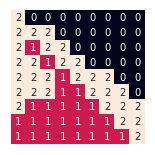

Episode 835	  Score: -125.04
0.1


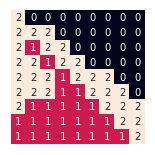

Episode 836	  Score: -115.29
0.1


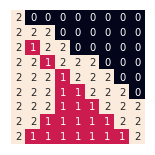

Episode 837	  Score: -118.93
0.1


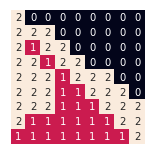

Episode 838	  Score: -84.59
0.1


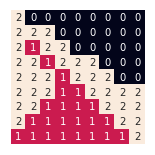

Episode 839	  Score: -124.92
0.1


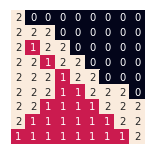

Episode 840	  Score: -115.36
0.1


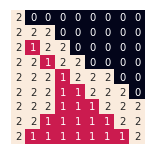

Episode 841	  Score: -84.64
0.1


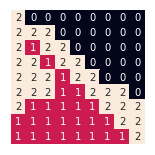

Episode 842	  Score: -115.65
0.1


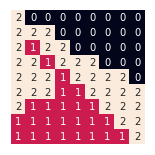

Episode 843	  Score: -129.41
0.1


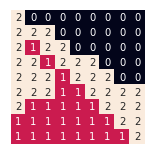

Episode 844	  Score: -113.11
0.1


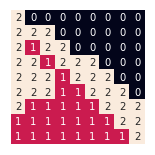

Episode 845	  Score: -74.69
0.1


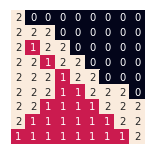

Episode 846	  Score: -104.80
0.1


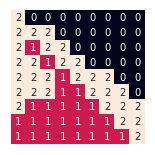

Episode 847	  Score: -71.15
0.1


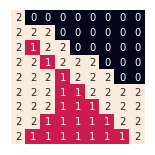

Episode 848	  Score: -99.36
0.1


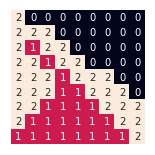

Episode 849	  Score: -54.69
0.1


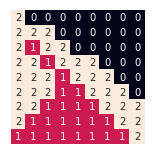

Episode 850	  Score: -172.91
0.1


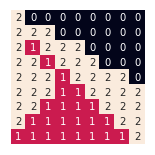

Episode 851	  Score: -102.00
0.1


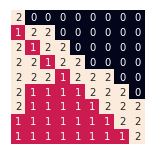

Episode 852	  Score: -70.07
0.1


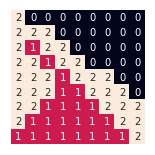

Episode 853	  Score: -111.47
0.1


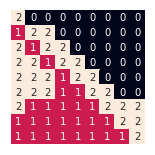

Episode 854	  Score: -115.25
0.1


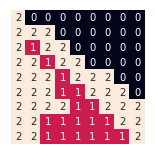

Episode 855	  Score: -125.80
0.1


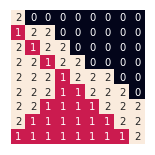

Episode 856	  Score: -101.01
0.1


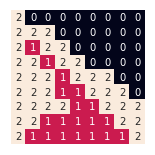

Episode 857	  Score: -149.00
0.1


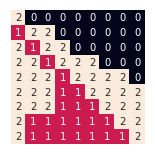

Episode 858	  Score: -133.39
0.1


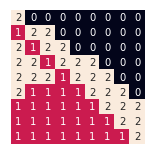

Episode 859	  Score: -84.26
0.1


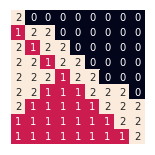

Episode 860	  Score: -133.59
0.1


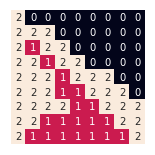

Episode 861	  Score: -101.79
0.1


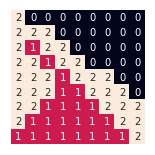

Episode 862	  Score: -110.02
0.1


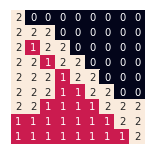

Episode 863	  Score: -123.58
0.1


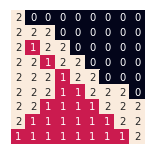

Episode 864	  Score: -125.45
0.1


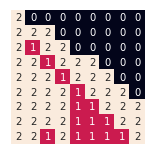

Episode 865	  Score: -118.34
0.1


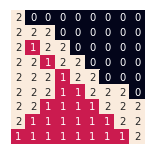

Episode 866	  Score: -78.95
0.1


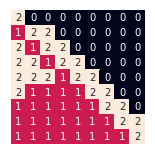

Episode 867	  Score: -104.17
0.1


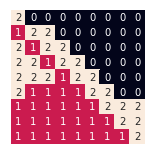

Episode 868	  Score: -106.86
0.1


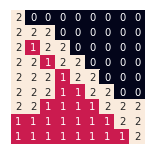

Episode 869	  Score: -82.90
0.1


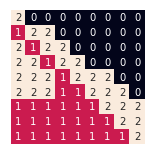

Episode 870	  Score: -139.78
0.1


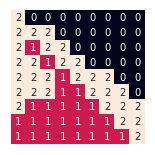

Episode 871	  Score: -101.16
0.1


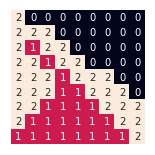

Episode 872	  Score: -76.44
0.1


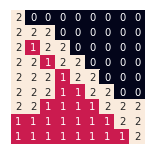

Episode 873	  Score: -162.00
0.1


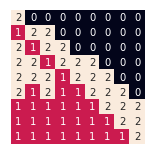

Episode 874	  Score: -123.07
0.1


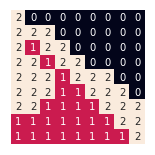

Episode 875	  Score: -106.62
0.1


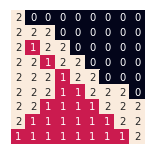

Episode 876	  Score: -102.68
0.1


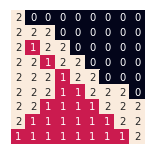

Episode 877	  Score: -141.80
0.1


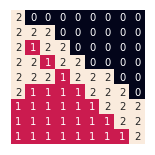

Episode 878	  Score: -126.10
0.1


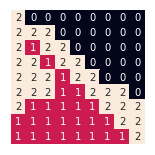

Episode 879	  Score: -121.93
0.1


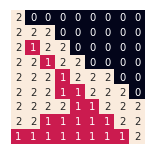

Episode 880	  Score: -108.52
0.1


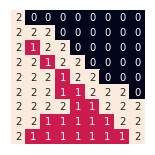

Episode 881	  Score: -120.78
0.1


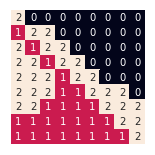

Episode 882	  Score: -100.92
0.1


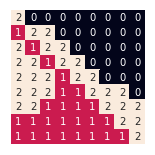

Episode 883	  Score: -119.51
0.1


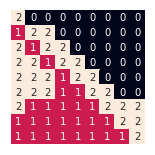

Episode 884	  Score: -98.66
0.1


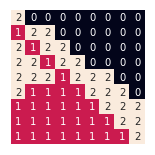

Episode 885	  Score: -107.83
0.1


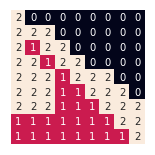

Episode 886	  Score: -69.54
0.1


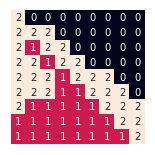

Episode 887	  Score: -133.06
0.1


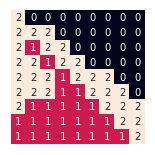

Episode 888	  Score: -152.33
0.1


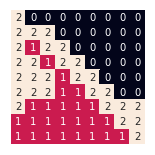

Episode 889	  Score: -104.25
0.1


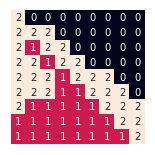

Episode 890	  Score: -100.51
0.1


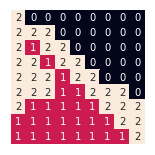

Episode 891	  Score: -147.89
0.1


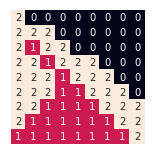

Episode 892	  Score: -136.54
0.1


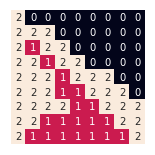

Episode 893	  Score: -114.27
0.1


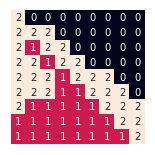

Episode 894	  Score: -168.08
0.1


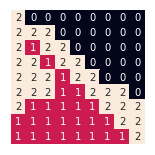

Episode 895	  Score: -74.73
0.1


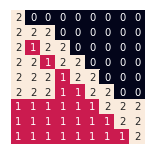

Episode 896	  Score: -116.27
0.1


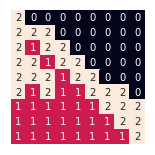

Episode 897	  Score: -118.33
0.1


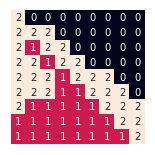

Episode 898	  Score: -100.00
0.1


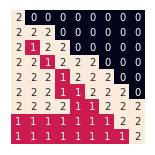

Episode 899	  Score: -103.51
0.1


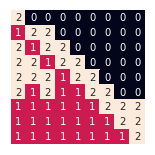

Episode 900	  Score: -121.26
0.1


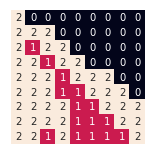

Episode 901	  Score: -146.18
0.1


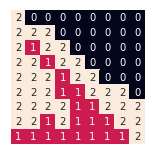

Episode 902	  Score: -98.98
0.1


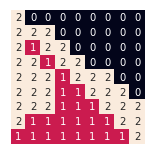

Episode 903	  Score: -152.81
0.1


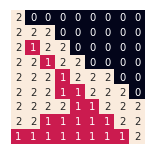

Episode 904	  Score: -117.43
0.1


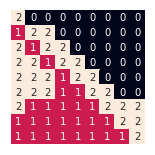

Episode 905	  Score: -132.43
0.1


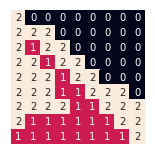

Episode 906	  Score: -125.60
0.1


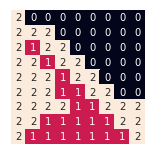

Episode 907	  Score: -123.61
0.1


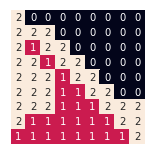

Episode 908	  Score: -112.95
0.1


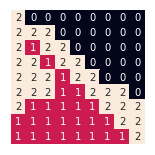

Episode 909	  Score: -87.19
0.1


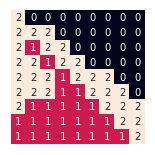

Episode 910	  Score: -145.51
0.1


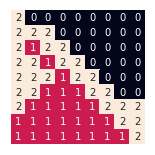

Episode 911	  Score: -94.86
0.1


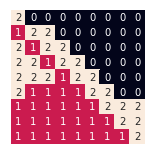

Episode 912	  Score: -144.15
0.1


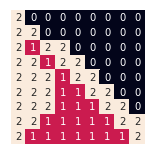

Episode 913	  Score: -192.25
0.1


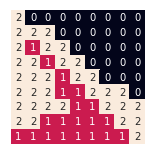

Episode 914	  Score: -144.31
0.1


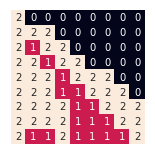

Episode 915	  Score: -97.52
0.1


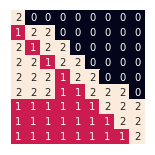

Episode 916	  Score: -77.42
0.1


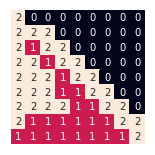

Episode 917	  Score: -105.86
0.1


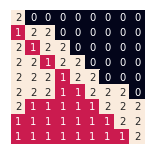

Episode 918	  Score: -102.09
0.1


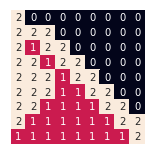

Episode 919	  Score: -95.87
0.1


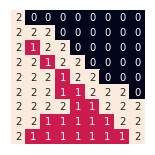

Episode 920	  Score: -77.60
0.1


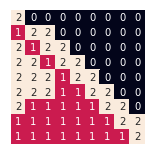

Episode 921	  Score: -133.05
0.1


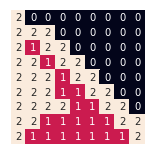

Episode 922	  Score: -136.06
0.1


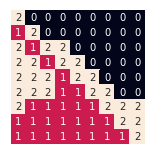

Episode 923	  Score: -40.82
0.1


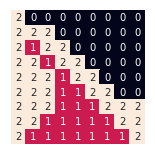

Episode 924	  Score: -133.97
0.1


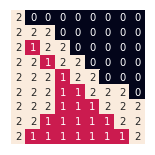

Episode 925	  Score: -70.92
0.1


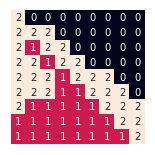

Episode 926	  Score: -102.74
0.1


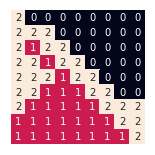

Episode 927	  Score: -70.86
0.1


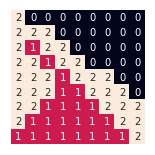

Episode 928	  Score: -95.47
0.1


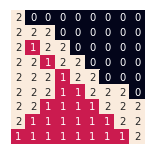

Episode 929	  Score: -70.02
0.1


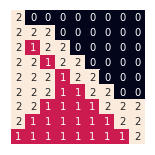

Episode 930	  Score: -117.47
0.1


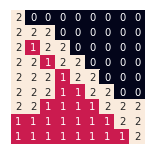

Episode 931	  Score: -78.22
0.1


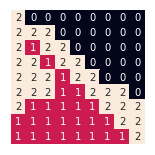

Episode 932	  Score: -128.63
0.1


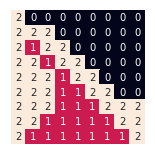

Episode 933	  Score: -169.38
0.1


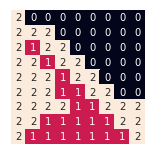

Episode 934	  Score: -166.34
0.1


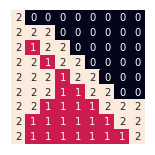

Episode 935	  Score: -102.65
0.1


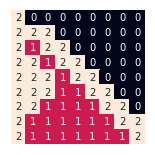

Episode 936	  Score: -100.08
0.1


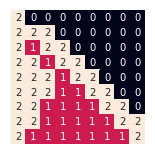

Episode 937	  Score: -102.65
0.1


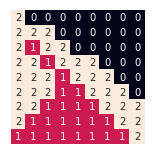

Episode 938	  Score: -120.65
0.1


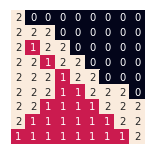

Episode 939	  Score: -103.27
0.1


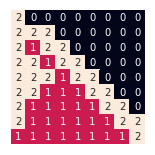

Episode 940	  Score: -80.46
0.1


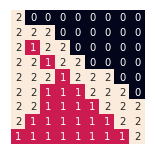

Episode 941	  Score: -180.28
0.1


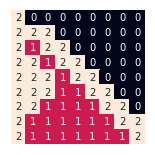

Episode 942	  Score: -130.54
0.1


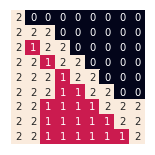

Episode 943	  Score: -77.03
0.1


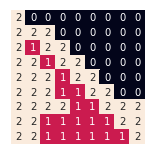

Episode 944	  Score: -112.80
0.1


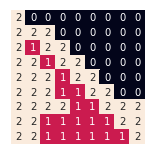

Episode 945	  Score: -140.52
0.1


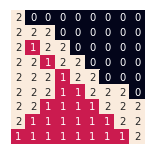

Episode 946	  Score: -148.42
0.1


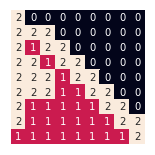

Episode 947	  Score: -113.03
0.1


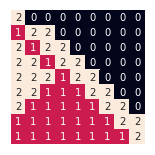

Episode 948	  Score: -105.79
0.1


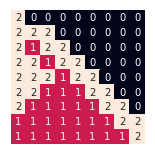

Episode 949	  Score: -111.30
0.1


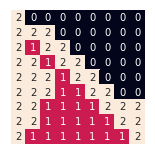

Episode 950	  Score: -75.47
0.1


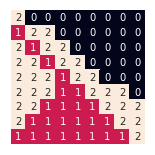

Episode 951	  Score: -144.81
0.1


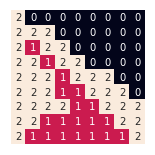

Episode 952	  Score: -96.44
0.1


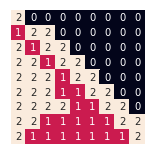

Episode 953	  Score: -157.36
0.1


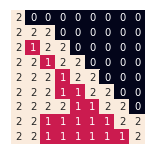

Episode 954	  Score: -116.32
0.1


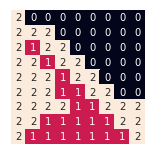

Episode 955	  Score: -100.32
0.1


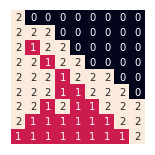

Episode 956	  Score: -66.26
0.1


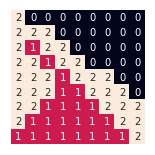

Episode 957	  Score: -156.66
0.1


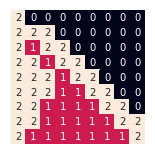

Episode 958	  Score: -94.61
0.1


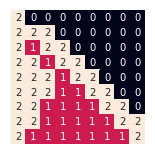

Episode 959	  Score: -120.70
0.1


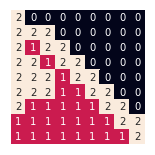

Episode 960	  Score: -123.85
0.1


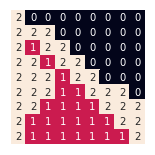

Episode 961	  Score: -123.07
0.1


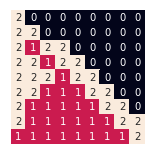

Episode 962	  Score: -103.56
0.1


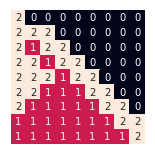

Episode 963	  Score: -82.49
0.1


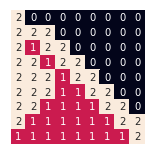

Episode 964	  Score: -109.61
0.1


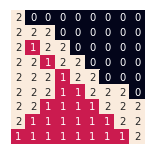

Episode 965	  Score: -85.98
0.1


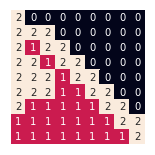

Episode 966	  Score: -111.14
0.1


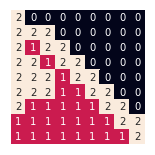

Episode 967	  Score: -80.07
0.1


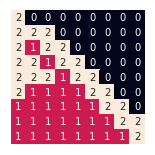

Episode 968	  Score: -83.09
0.1


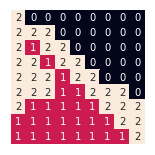

Episode 969	  Score: -105.45
0.1


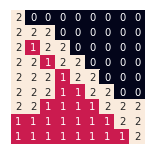

Episode 970	  Score: -127.42
0.1


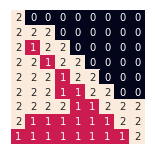

Episode 971	  Score: -159.14
0.1


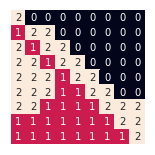

Episode 972	  Score: -83.70
0.1


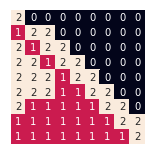

Episode 973	  Score: -153.42
0.1


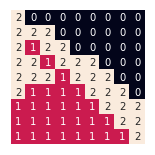

Episode 974	  Score: -132.72
0.1


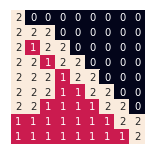

Episode 975	  Score: -134.94
0.1


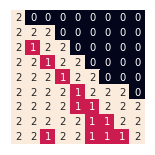

Episode 976	  Score: -115.11
0.1


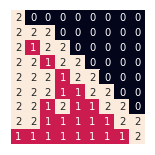

Episode 977	  Score: -76.39
0.1


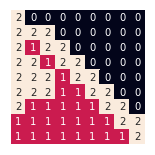

Episode 978	  Score: -118.60
0.1


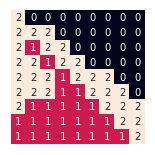

Episode 979	  Score: -133.00
0.1


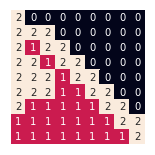

Episode 980	  Score: -101.17
0.1


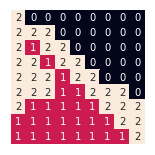

Episode 981	  Score: -172.25
0.1


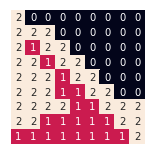

Episode 982	  Score: -89.57
0.1


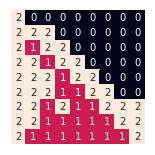

Episode 983	  Score: -121.11
0.1


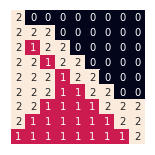

Episode 984	  Score: -103.08
0.1


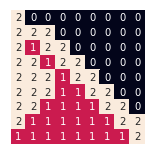

Episode 985	  Score: -130.14
0.1


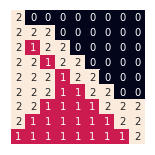

Episode 986	  Score: -153.31
0.1


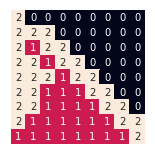

Episode 987	  Score: -110.08
0.1


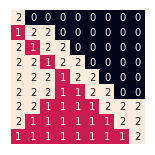

Episode 988	  Score: -112.78
0.1


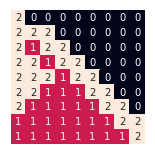

Episode 989	  Score: -125.35
0.1


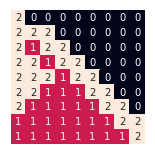

Episode 990	  Score: -91.20
0.1


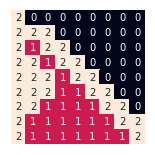

Episode 991	  Score: -135.26
0.1


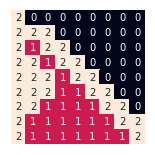

Episode 992	  Score: -117.07
0.1


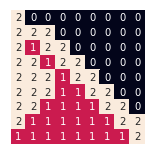

Episode 993	  Score: -64.16
0.1


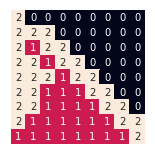

Episode 994	  Score: -101.90
0.1


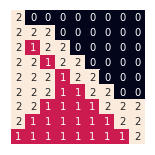

Episode 995	  Score: -115.44
0.1


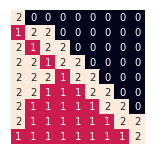

Episode 996	  Score: -116.55
0.1


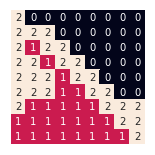

Episode 997	  Score: -125.03
0.1


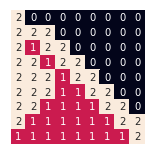

Episode 998	  Score: -111.25
0.1


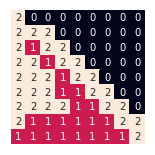

Episode 999	  Score: -116.60
0.1


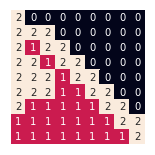

Episode 1000	  Score: -70.06
0.1


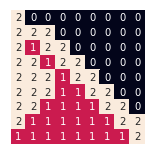

Episode 1001	  Score: -131.10
0.1


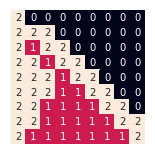

Episode 1002	  Score: -107.17
0.1


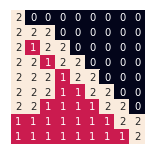

Episode 1003	  Score: -133.32
0.1


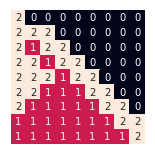

Episode 1004	  Score: -91.44
0.1


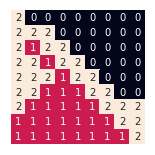

Episode 1005	  Score: -132.05
0.1


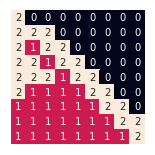

Episode 1006	  Score: -143.76
0.1


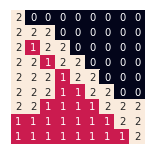

Episode 1007	  Score: -98.37
0.1


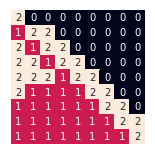

Episode 1008	  Score: -90.02
0.1


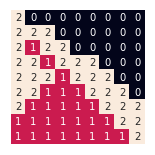

Episode 1009	  Score: -83.35
0.1


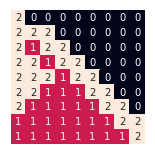

Episode 1010	  Score: -145.96
0.1


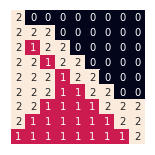

Episode 1011	  Score: -111.17
0.1


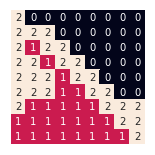

Episode 1012	  Score: -65.01
0.1


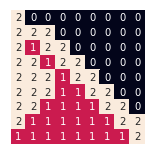

Episode 1013	  Score: -109.54
0.1


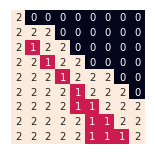

Episode 1014	  Score: -87.88
0.1


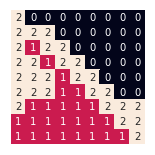

Episode 1015	  Score: -76.12
0.1


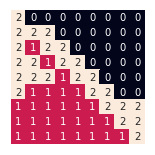

Episode 1016	  Score: -102.83
0.1


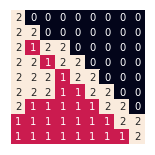

Episode 1017	  Score: -70.88
0.1


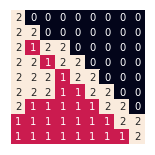

Episode 1018	  Score: -107.50
0.1


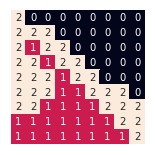

Episode 1019	  Score: -157.35
0.1


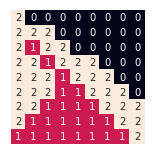

Episode 1020	  Score: -115.54
0.1


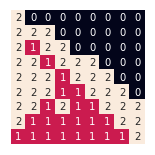

Episode 1021	  Score: -162.89
0.1


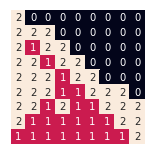

Episode 1022	  Score: -94.51
0.1


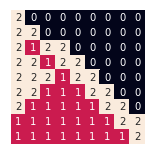

Episode 1023	  Score: -113.67
0.1


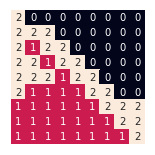

Episode 1024	  Score: -93.17
0.1


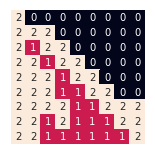

Episode 1025	  Score: -109.72
0.1


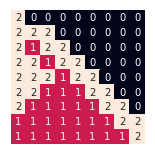

Episode 1026	  Score: -85.10
0.1


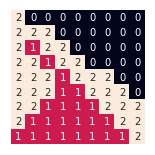

Episode 1027	  Score: -59.92
0.1


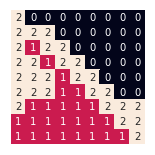

Episode 1028	  Score: -123.37
0.1


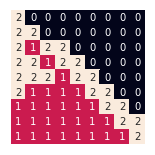

Episode 1029	  Score: -160.97
0.1


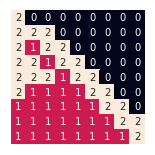

Episode 1030	  Score: -67.92
0.1


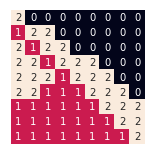

Episode 1031	  Score: -95.01
0.1


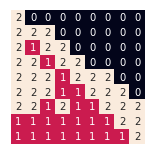

Episode 1032	  Score: -150.61
0.1


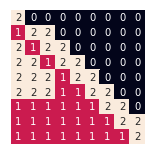

Episode 1033	  Score: -89.50
0.1


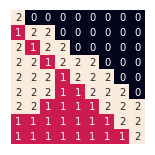

Episode 1034	  Score: -107.71
0.1


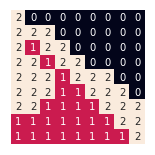

Episode 1035	  Score: -117.63
0.1


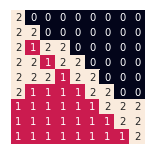

Episode 1036	  Score: -123.70
0.1


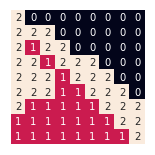

Episode 1037	  Score: -105.77
0.1


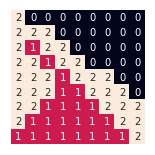

Episode 1038	  Score: -123.01
0.1


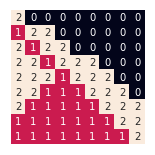

Episode 1039	  Score: -100.99
0.1


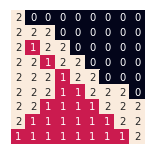

Episode 1040	  Score: -107.23
0.1


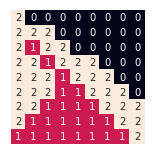

Episode 1041	  Score: -119.96
0.1


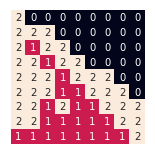

Episode 1042	  Score: -138.71
0.1


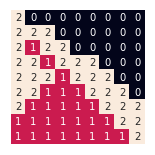

Episode 1043	  Score: -115.89
0.1


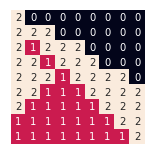

Episode 1044	  Score: -124.22
0.1


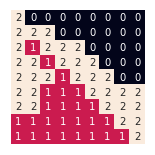

Episode 1045	  Score: -140.13
0.1


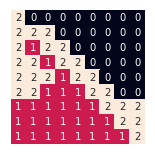

Episode 1046	  Score: -110.54
0.1


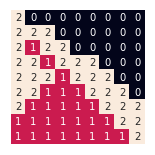

Episode 1047	  Score: -81.37
0.1


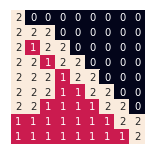

Episode 1048	  Score: -101.08
0.1


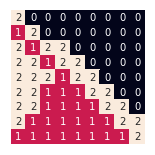

Episode 1049	  Score: -90.27
0.1


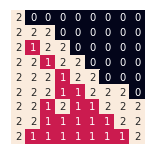

Episode 1050	  Score: -129.78
0.1


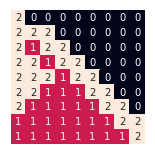

Episode 1051	  Score: -68.35
0.1


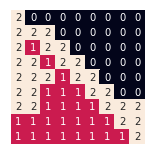

Episode 1052	  Score: -105.13
0.1


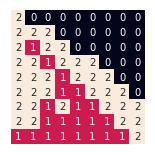

Episode 1053	  Score: -128.37
0.1


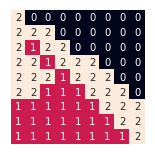

Episode 1054	  Score: -115.90
0.1


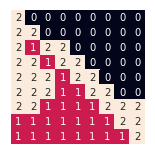

Episode 1055	  Score: -109.79
0.1


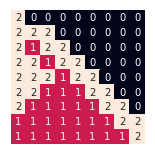

Episode 1056	  Score: -73.37
0.1


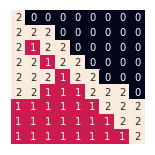

Episode 1057	  Score: -87.97
0.1


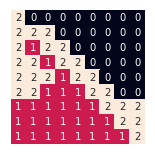

Episode 1058	  Score: -160.28
0.1


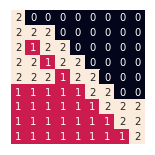

In [ ]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.1, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    first_override = []
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(np.asarray(state), eps)
            next_state, reward = env.takeAction(action)
            reward_val = evalReward(reward)
            agent.step(state, action, reward_val, next_state)
            state = next_state
            score += reward_val
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps*eps_decay) # decrease epsilon
        print('\rEpisode {}\t  Score: {:.2f}'.format(i_episode, np.mean(score)))
        print(eps)
        # plot 
        policy = agent.extractPolicy()
        if policy[(1,0)] == 2:
            first_override.append(i_episode)
        f, ax = plt.subplots(figsize=(3,3))
        ax.imshow(policy)
        ax = sns.heatmap(policy, annot=True)
        cb = ax.collections[-1].colorbar   
        cb.remove()
        plt.xticks([])
        plt.yticks([])
        plt.show()
    return scores, first_override

scores, overrides = dqn()

In [50]:
overrides

[1,
 2,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 39,
 66,
 74,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 156,
 157,
 160,
 161,
 162,
 163]

In [51]:
state = torch.from_numpy(np.asarray([1, 0])).float().unsqueeze(0).to("cpu")
agent.qnetwork_local.eval()
with torch.no_grad():
    action_values = agent.qnetwork_local(state)

In [52]:
action_values

tensor([[-5.2961, -4.6778, -4.8439]])

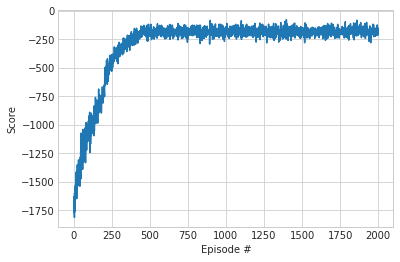

In [53]:
# plot the scores
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [30]:
0.35*1000 * (1 - rho) - rho * 0.35*1000

-72.28469848632812